# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from google.colab import drive
import torch
import torch.nn as nn
import torch.optim as optim
drive.mount('/content/drive')

Mounted at /content/drive


## About Dataset
Context
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327 billion US dollars and total costs with undiagnosed diabetes and prediabetes approaching US$400 billion dollars annually. <br><br>

## Content
The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contain:
diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

# 1.Бинарный Классификатор

In [ ]:
file_path = '/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

# Описание наборов данных

In [ ]:
# Наборов данных который использовались

lis= df.columns
lis = list(lis)
lis.pop(0)
print(len(lis), 'columns')
print()
for i in lis:
  print(i)

21 columns

HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income


In [ ]:
#Проверить, нет ли недостающих данных

df.isnull().sum()/df.shape[0]

,0
Diabetes_012,0.0
HighBP,0.0
HighChol,0.0
CholCheck,0.0
BMI,0.0
Smoker,0.0
Stroke,0.0
HeartDiseaseorAttack,0.0
PhysActivity,0.0
Fruits,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df['Diabetes_012'] = df['Diabetes_012'].replace({2 : 1})

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.shape

(229712, 22)

#Признаки, которые были использованы для анализа

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        min_value = df[col].min()
        max_value = df[col].max()
        print(f"Kolom {col}: ({min_value}; {max_value})")
    # else:
    #     print(f"Kolom {col}: Bukan tipe numerik")

Kolom Diabetes_012: (0.0; 1.0)
Kolom HighBP: (0.0; 1.0)
Kolom HighChol: (0.0; 1.0)
Kolom CholCheck: (0.0; 1.0)
Kolom BMI: (12.0; 98.0)
Kolom Smoker: (0.0; 1.0)
Kolom Stroke: (0.0; 1.0)
Kolom HeartDiseaseorAttack: (0.0; 1.0)
Kolom PhysActivity: (0.0; 1.0)
Kolom Fruits: (0.0; 1.0)
Kolom Veggies: (0.0; 1.0)
Kolom HvyAlcoholConsump: (0.0; 1.0)
Kolom AnyHealthcare: (0.0; 1.0)
Kolom NoDocbcCost: (0.0; 1.0)
Kolom GenHlth: (1.0; 5.0)
Kolom MentHlth: (0.0; 30.0)
Kolom PhysHlth: (0.0; 30.0)
Kolom DiffWalk: (0.0; 1.0)
Kolom Sex: (0.0; 1.0)
Kolom Age: (1.0; 13.0)
Kolom Education: (1.0; 6.0)
Kolom Income: (1.0; 8.0)


# Model 1 (Binary Classificator)

In [ ]:
# Splitting data into features and target
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

# Splitting into train, validation, and test sets   train_size=0.7   test_size=0.6
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7,
                                                    random_state=77
                                                    )
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66,
                                                random_state=77
                                                )

Эта часть использует функцию train_test_split из модуля sklearn.model_selection для разделения данных. Эта функция используется для разделения набора данных на подмножества для обучения, проверки и тестирования.

  - X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=77):
    - Эта строка разделяет признаки (X) и целевые (y) данные на две части.
    - Аргумент test_size=0.7 означает, что 70% данных будут использованы для X_temp и y_temp, а оставшиеся 30% будут использованы для обучения (X_train и y_train).
    - random_state=77 гарантирует, что разделение будет воспроизводимым, то есть каждый раз, когда вы запускаете код с одним и тем же random_state, разделение будет одинаковым. Это полезно для отладки и обеспечения согласованности.

  - X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=77):
    - Эта строка дополнительно разделяет временные наборы данных (X_temp и y_temp) на проверочный и тестовый наборы.
    - test_size=0.66 означает, что 66% X_temp и y_temp будут использованы для тестового набора (X_test и y_test), а оставшиеся 34% будут использованы для проверочного набора (X_val и y_val).
    - Опять же, random_state=77 обеспечивает воспроизводимое разделение.

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


- X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
  - X_train - это pandas DataFrame, содержащий обучающие признаки.
  - X_train.values извлекает базовый массив NumPy из DataFrame.
  - torch.tensor() - это функция PyTorch, которая создает тензор из массива NumPy.
  - dtype=torch.float32 указывает, что тип данных тензора должен быть 32-битным числом с плавающей точкой. Это распространенный тип данных для обучения нейронных сетей.
  - Результирующий тензор присваивается переменной X_train_tensor.

- X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
  - Эта строка выполняет ту же операцию, что и выше, но для признаков проверки (X_val), сохраняя результирующий тензор в X_val_tensor.

- X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
  - Эта строка выполняет ту же операцию, что и выше, но для признаков тестирования (X_test), сохраняя результирующий тензор в X_test_tensor.

- y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
  - y_train - это pandas Series, содержащий обучающие целевые переменные.
  - y_train.values извлекает базовый массив NumPy из Series.
  - torch.tensor() создает тензор из массива NumPy.
  - dtype=torch.float32 задает тип данных тензора как 32-битные числа с плавающей точкой.
  - Результирующий тензор присваивается переменной y_train_tensor.

- y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
  - Эта строка выполняет ту же операцию, что и выше, но для целевых переменных проверки (y_val), сохраняя результирующий тензор в y_val_tensor.

- y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
  - Эта строка выполняет ту же операцию, что и выше, но для целевых переменных тестирования (y_test), сохраняя результирующий тензор в y_test_tensor.

# Параметры архитектур и обучения нейронных сетей, использованные для обучения

In [ ]:
# Binary Classifier
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

- class BinaryClassifier(nn.Module):
  - Это как создание чертежа для нашей машины "да/нет". Мы называем эту машину BinaryClassifier, потому что она будет классифицировать вещи на две категории. nn.Module означает, что это особый тип чертежа, который понимает PyTorch.

- def __init__(self, input_dim):
  - Это как конструктор или настройка машины. Когда вы строите машину, вам нужно указать, сколько входов она будет получать. input_dim - это количество входных признаков. Например, если бы вы использовали машину для классификации изображений, input_dim могло бы быть количеством пикселей.

- super(BinaryClassifier, self).__init__()
  - Это как необходимый шаг для обеспечения работы нашей машины в соответствии с правилами PyTorch для чертежей машин.

- self.network = nn.Sequential(...):
  - Здесь строится сама машина. Она состоит из последовательности слоев, как конвейер:
  - nn.Linear(input_dim, 64): Это линейный слой. Он берет необработанный вход и вычисляет набор из 64 чисел. Думайте об этом как об извлечении некоторой основной информации из входных данных.
  - nn.ReLU(): Это функция активации, которая добавляет нелинейность. Она действует как переключатель, делая числа более интересными и полезными.
  - nn.Linear(64, 32): Это еще один линейный слой. Он берет эти 64 числа и вычисляет набор из 32 новых чисел. Это похоже на дальнейшее извлечение некоторой основной информации.
  - nn.ReLU(): Еще одна функция активации, делающая числа полезными для обучения.
  - nn.Linear(32, 1): Этот линейный слой получает 32 числа из предыдущего слоя и вычисляет одно число.
    - nn.Sigmoid(): Это окончательное "сжатие", которое преобразует одно число в вероятность от 0 до 1, как оценку того, насколько вероятно, что вход является "да".

In [ ]:
# Instantiate the model
input_dim = X_train.shape[1]
binary_model = BinaryClassifier(input_dim)

- input_dim = X_train.shape[1]
  - X_train - это pandas DataFrame, содержащий признаки для обучения.
  - .shape - это атрибут DataFrame, который возвращает кортеж, представляющий размеры DataFrame. В данном случае, X_train.shape вернет кортеж вида (количество строк, количество столбцов).
  - [1] используется для доступа ко второму элементу этого кортежа, который представляет количество столбцов в DataFrame. Это соответствует количеству признаков в наших обучающих данных.
  - Количество признаков сохраняется в переменной input_dim. Это очень важно, потому что первый слой нашей нейронной сети должен знать размер входных данных.

- binary_model = BinaryClassifier(input_dim)
  - Эта строка создает экземпляр (объект) класса BinaryClassifier. BinaryClassifier - это класс, который был определен ранее в блокноте.
  - Мы передаем input_dim в качестве аргумента методу __init__ (конструктору) класса BinaryClassifier. Это сообщает модели, сколько входных признаков ожидать. Метод __init__ в классе BinaryClassifier использует это значение для определения размера первого слоя nn.Linear.
  - Вновь созданный объект модели присваивается переменной binary_model. Теперь binary_model представляет собой полностью настроенную нейронную сеть, которая готова к обучению.

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(binary_model.parameters(),
                       lr=.01,
                       )

Этот фрагмент кода настраивает функцию потерь и оптимизатор для обучения нейронной сети PyTorch.

- criterion = nn.BCELoss()
  - `criterion` - это переменная, которая будет хранить функцию потерь.
  - `nn.BCELoss()` - это класс PyTorch, реализующий функцию потерь бинарной кросс-энтропии. Эта функция потерь обычно используется для задач бинарной классификации, где цель состоит в том, чтобы предсказать один из двух классов (например, 0 или 1, да или нет).
  - Выход нейронной сети обычно пропускается через функцию активации `Sigmoid` [1], которая выводит значение вероятности от 0 до 1.
  - Затем `BCELoss` вычисляет потери (или ошибку) между прогнозируемой вероятностью и истинной меткой (0 или 1).

- optimizer = optim.Adam(binary_model.parameters(), lr = 0.01)
  - `optimizer` - это переменная, которая будет хранить алгоритм оптимизации, используемый для обновления весов модели.
  - `optim.Adam` - это класс PyTorch, реализующий алгоритм оптимизации Adam. Adam - популярный алгоритм оптимизации, известный своей эффективностью при обучении нейронных сетей.
  - `binary_model.parameters()` предоставляет оптимизатору все обучаемые параметры (веса и смещения) нейронной сети `binary_model`. Это значения, которые оптимизатор будет корректировать в процессе обучения, чтобы минимизировать потери.
  - `lr=.01` устанавливает скорость обучения оптимизатора равной 0.01. Скорость обучения контролирует, насколько сильно корректируются веса модели в ответ на рассчитанные потери. Более высокая скорость обучения может привести к более быстрому обучению, но также может привести к тому, что модель проскочит оптимальное решение. Более низкая скорость обучения может привести к более медленному обучению, но потенциально может найти более точное решение.


In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    binary_model.train()
    optimizer.zero_grad()
    outputs = binary_model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation step
    binary_model.eval()
    with torch.no_grad():
        val_outputs = binary_model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train_tensor.numpy(), (outputs.numpy() >= 0.5).astype(int))
        val_accuracy = accuracy_score(y_val_tensor.numpy(), (val_outputs.numpy() >= 0.5).astype(int))

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break


Epoch 1/100, Loss: 0.6003632545471191, Val Loss: 0.48277419805526733, Train Acc: 0.8383, Val Acc: 0.8430
Epoch 2/100, Loss: 0.48595282435417175, Val Loss: 0.5022620558738708, Train Acc: 0.8415, Val Acc: 0.8430
Epoch 3/100, Loss: 0.5060280561447144, Val Loss: 0.48068106174468994, Train Acc: 0.8415, Val Acc: 0.8430
Epoch 4/100, Loss: 0.4839993417263031, Val Loss: 0.4576018750667572, Train Acc: 0.8415, Val Acc: 0.8430
Epoch 5/100, Loss: 0.46024590730667114, Val Loss: 0.4505738317966461, Train Acc: 0.8415, Val Acc: 0.8430
Epoch 6/100, Loss: 0.4526076018810272, Val Loss: 0.4543033540248871, Train Acc: 0.8415, Val Acc: 0.8430
Epoch 7/100, Loss: 0.45591968297958374, Val Loss: 0.45622628927230835, Train Acc: 0.8415, Val Acc: 0.8429
Epoch 8/100, Loss: 0.4576941430568695, Val Loss: 0.4466758668422699, Train Acc: 0.8413, Val Acc: 0.8429
Epoch 9/100, Loss: 0.4482239782810211, Val Loss: 0.43610164523124695, Train Acc: 0.8414, Val Acc: 0.8430
Epoch 10/100, Loss: 0.43785566091537476, Val Loss: 0.4326

- num_epochs = 100: Эта строка устанавливает максимальное количество эпох обучения равным 100. Эпоха - это один полный проход по всему обучающему набору данных.
- patience = 5: Это устанавливает patience (терпение) для ранней остановки равным 5. Это означает, что обучение остановится, если значение ошибки на проверочном наборе не улучшится в течение 5 последовательных эпох.
- train_losses, val_losses = [], []: Эти строки инициализируют пустые списки для хранения значений ошибок на обучающем и проверочном наборах для каждой эпохи.
- train_accuracies, val_accuracies = [], []: Эти строки инициализируют пустые списки для хранения значений точности на обучающем и проверочном наборах для каждой эпохи.
- best_val_loss = float('inf'): Эта строка инициализирует best_val_loss (лучшую ошибку на проверочном наборе) положительной бесконечностью. Эта переменная будет хранить наименьшее значение ошибки на проверочном наборе, встреченное до сих пор во время обучения.
- trigger_times = 0: Эта переменная будет считать количество эпох, в течение которых ошибка на проверочном наборе не улучшилась.

- for epoch in range(num_epochs):: Этот цикл перебирает каждую эпоху, от 0 до num_epochs (не включая).
- binary_model.train(): Переводит binary_model в режим обучения, который включает слои dropout и batch normalization (если есть) для правильного поведения.
- optimizer.zero_grad(): Эта строка очищает градиенты всех оптимизированных переменных. Градиенты необходимо сбрасывать в ноль перед каждым проходом обучения.
- outputs = binary_model(X_train_tensor).squeeze(): Это пропускает обучающие данные (X_train_tensor) через binary_model для получения предсказанных результатов. .squeeze() удаляет любые ненужные измерения размера один.
- loss = criterion(outputs, y_train_tensor): Это вычисляет ошибку между предсказанными результатами и фактическими целевыми значениями (y_train_tensor) с использованием criterion (бинарная кросс-энтропия).
- loss.backward(): Эта строка вычисляет градиенты ошибки по отношению к параметрам модели, используя обратное распространение.
- optimizer.step(): Эта строка обновляет параметры модели на основе вычисленных градиентов с использованием алгоритма оптимизации (optimizer, в данном случае Adam).

- binary_model.eval(): Переводит binary_model в режим оценки. Это отключает слои dropout и batch normalization.
- with torch.no_grad():: Этот менеджер контекста гарантирует, что градиенты не вычисляются во время шага проверки, экономя память и вычисления.
- val_outputs = binary_model(X_val_tensor).squeeze(): Пропускает данные проверки (X_val_tensor) через модель для получения предсказанных результатов.
- val_loss = criterion(val_outputs, y_val_tensor): Вычисляет ошибку на проверочном наборе, используя результаты проверки и фактические целевые значения (y_val_tensor).
- train_accuracy = accuracy_score(y_train_tensor.numpy(), (outputs.numpy() >= 0.5).astype(int)): Вычисляет точность на обучающем наборе. Сначала тензоры преобразуются в массивы NumPy с использованием .numpy(). Затем предсказанные вероятности преобразуются в бинарные предсказания (0 или 1) путем сравнения с 0.5, и, наконец, вычисляется точность.
- val_accuracy = accuracy_score(y_val_tensor.numpy(), (val_outputs.numpy() >= 0.5).astype(int)): Аналогично, вычисляет точность на проверочном наборе, сначала преобразуя тензоры в массивы NumPy, а затем предсказанные вероятности в бинарные предсказания.

- train_losses.append(loss.item()): Значение ошибки обучения для текущей эпохи добавляется в список
- train_losses. loss.item() извлекает числовое значение из тензора ошибки.
- val_losses.append(val_loss.item()): Значение ошибки проверки для текущей эпохи добавляется в список val_losses.
- train_accuracies.append(train_accuracy): Значение точности обучения для текущей эпохи добавляется в список train_accuracies.
- val_accuracies.append(val_accuracy): Значение точности проверки для текущей эпохи добавляется в список val_accuracies.


- if val_loss < best_val_loss:: Проверяет, является ли текущая ошибка на проверочном наборе меньше, чем best_val_loss.
  - Если истинно, это означает, что модель улучшилась на проверочном наборе. best_val_loss обновляется до текущего значения val_loss, а trigger_times сбрасывается в 0.
- else:: Если текущая ошибка на проверочном наборе не меньше, чем best_val_loss, счетчик trigger_times увеличивается.
  - if trigger_times >= patience:: Проверяет, достиг ли счетчик trigger_times значения patience или превысил его.
    - Если истинно, цикл обучения завершается оператором break, поскольку ошибка на проверочном наборе не улучшалась в течение количества эпох, указанного patience. Это и есть ранняя остановка, и отображается сообщение "Сработала ранняя остановка".

## Evaluation metrics for binary classifier


In [ ]:
# Evaluation metrics for binary classifier
binary_model.eval()
with torch.no_grad():
    test_outputs = binary_model(X_test_tensor).squeeze()
    test_outputs = (test_outputs >= 0.5).float()
    print("Binary Classifier Metrics:")
    print(classification_report(y_test_tensor.numpy(), test_outputs.numpy()))
    print("AUC:", roc_auc_score(y_test_tensor.numpy(), test_outputs.numpy()))

Binary Classifier Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     98767
         1.0       0.56      0.16      0.25     18434

    accuracy                           0.85    117201
   macro avg       0.71      0.57      0.58    117201
weighted avg       0.81      0.85      0.81    117201

AUC: 0.5681741381706222


#Графики обучения для архитектур нейронных сетей с лучшими характеристиками эффективности

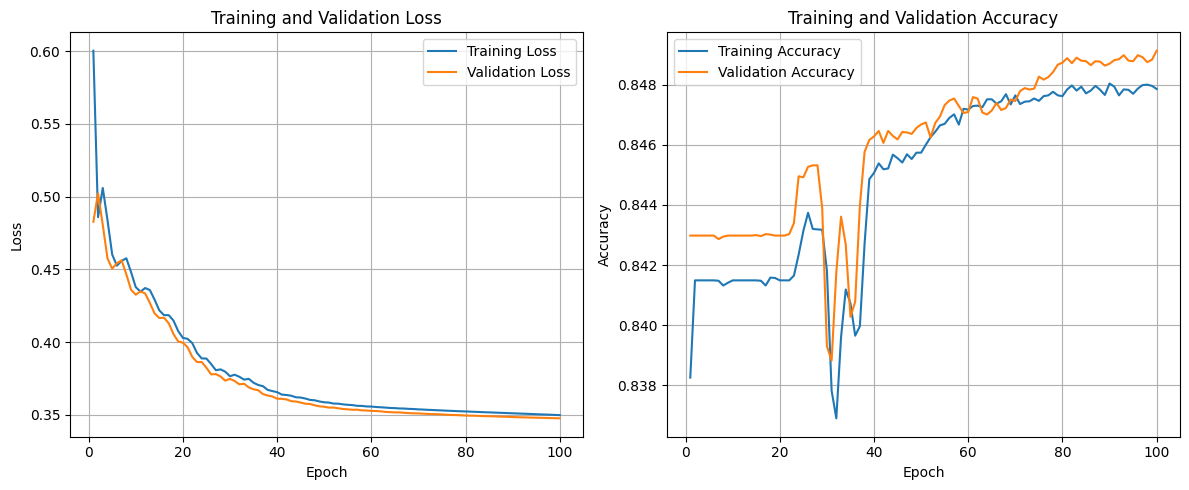

In [ ]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
probs = binary_model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()[:,0]
truth = y_test

In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

### Model, Recall, Precision, weighted_accuracy, AUC

In [ ]:
# Deep Learning - PY TORCH
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.1593,0.5646,0.5682,0.807


# Model 2 (Binary Classificator)

In [ ]:
# Splitting data into features and target
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,
                                                    random_state=42
                                                    )
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2,
                                                random_state=42
                                                )

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Binary Classifier
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Instantiate the model
input_dim = X_train.shape[1]
binary_model = BinaryClassifier(input_dim)

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(binary_model.parameters(),
                       lr=.001,
                      weight_decay=1e-5
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    binary_model.train()
    optimizer.zero_grad()
    outputs = binary_model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation step
    binary_model.eval()
    with torch.no_grad():
        val_outputs = binary_model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train_tensor.numpy(), (outputs.numpy() >= 0.5).astype(int))
        val_accuracy = accuracy_score(y_val_tensor.numpy(), (val_outputs.numpy() >= 0.5).astype(int))

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")


Epoch 1/100, Loss: 0.4873064458370209, Val Loss: 0.46601736545562744, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 2/100, Loss: 0.4699437618255615, Val Loss: 0.45559921860694885, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 3/100, Loss: 0.4601203203201294, Val Loss: 0.4511324167251587, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 4/100, Loss: 0.4561428129673004, Val Loss: 0.4499140977859497, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 5/100, Loss: 0.45524510741233826, Val Loss: 0.44919946789741516, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 6/100, Loss: 0.45467546582221985, Val Loss: 0.44761258363723755, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 7/100, Loss: 0.45311158895492554, Val Loss: 0.4451667070388794, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 8/100, Loss: 0.45056745409965515, Val Loss: 0.44250667095184326, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 9/100, Loss: 0.44774559140205383, Val Loss: 0.44035249948501587, Train Acc: 0.8421, Val Acc: 0.8448
Epoch 10/100, Loss: 0.44539713859558105, Val Loss: 0.

In [ ]:
# Evaluation metrics for binary classifier
binary_model.eval()
with torch.no_grad():
    test_outputs = binary_model(X_test_tensor).squeeze()
    test_outputs = (test_outputs >= 0.5).float()
    print("Binary Classifier Metrics:")
    print(classification_report(y_test_tensor.numpy(), test_outputs.numpy()))
    print("AUC:", roc_auc_score(y_test_tensor.numpy(), test_outputs.numpy()))

Binary Classifier Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      8507
         1.0       0.55      0.15      0.23      1641

    accuracy                           0.84     10148
   macro avg       0.70      0.56      0.57     10148
weighted avg       0.81      0.84      0.80     10148

AUC: 0.5625898863659401


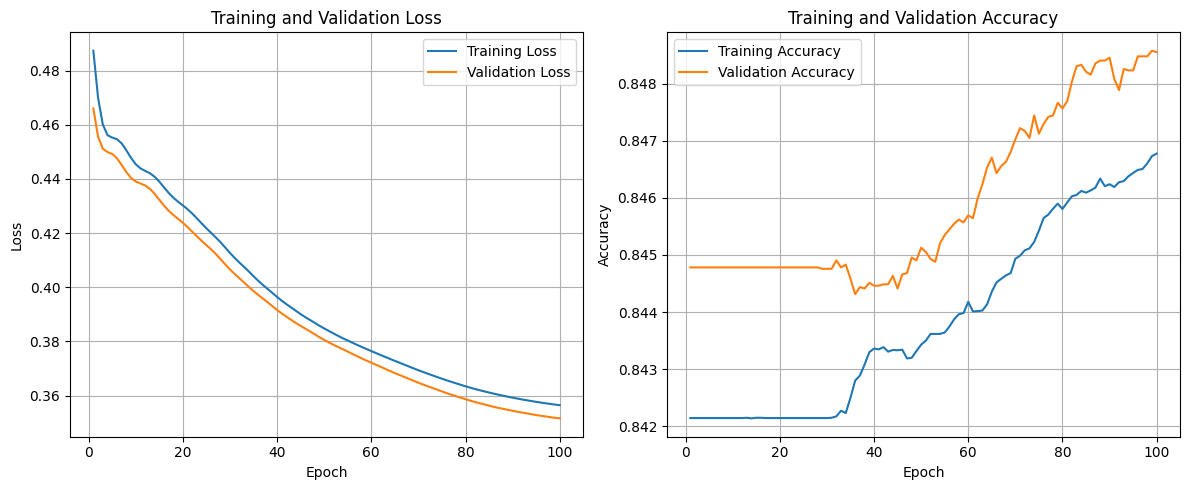

In [ ]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
probs = binary_model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()[:,0]
truth = y_test

In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['base_model', recall, precision, weighted_accuracy, auc]
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.1487,0.5495,0.5626,0.8079


# Model 3 (Binary Classificator)

In [ ]:
# Splitting data into features and target
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7,
                                                    random_state=77
                                                    )
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,
                                                random_state=77
                                                )

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Binary Classifier
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Instantiate the model
input_dim = X_train.shape[1]
binary_model = BinaryClassifier(input_dim)

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(binary_model.parameters(),
                       lr=.001,
                      weight_decay=1e-5
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    binary_model.train()
    optimizer.zero_grad()
    outputs = binary_model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation step
    binary_model.eval()
    with torch.no_grad():
        val_outputs = binary_model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train_tensor.numpy(), (outputs.numpy() >= 0.5).astype(int))
        val_accuracy = accuracy_score(y_val_tensor.numpy(), (val_outputs.numpy() >= 0.5).astype(int))

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break


Epoch 1/100, Loss: 0.6063098311424255, Val Loss: 0.5696967244148254, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 2/100, Loss: 0.570340633392334, Val Loss: 0.5399215817451477, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 3/100, Loss: 0.5407829880714417, Val Loss: 0.5166630148887634, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 4/100, Loss: 0.5177072882652283, Val Loss: 0.49927905201911926, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 5/100, Loss: 0.5004771947860718, Val Loss: 0.4868048429489136, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 6/100, Loss: 0.48815399408340454, Val Loss: 0.4782097637653351, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 7/100, Loss: 0.479680597782135, Val Loss: 0.47259336709976196, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 8/100, Loss: 0.47414809465408325, Val Loss: 0.4692057967185974, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 9/100, Loss: 0.47083553671836853, Val Loss: 0.46731099486351013, Train Acc: 0.8415, Val Acc: 0.8425
Epoch 10/100, Loss: 0.4689904749393463, Val Loss: 0.46617576

In [ ]:
# Evaluation metrics for binary classifier
binary_model.eval()
with torch.no_grad():
    test_outputs = binary_model(X_test_tensor).squeeze()
    test_outputs = (test_outputs >= 0.5).float()
    print("Binary Classifier Metrics:")
    print(classification_report(y_test_tensor.numpy(), test_outputs.numpy()))
    print("AUC:", roc_auc_score(y_test_tensor.numpy(), test_outputs.numpy()))

Binary Classifier Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     74857
         1.0       0.54      0.12      0.20     13931

    accuracy                           0.85     88788
   macro avg       0.70      0.55      0.56     88788
weighted avg       0.81      0.85      0.80     88788

AUC: 0.5514141227196285


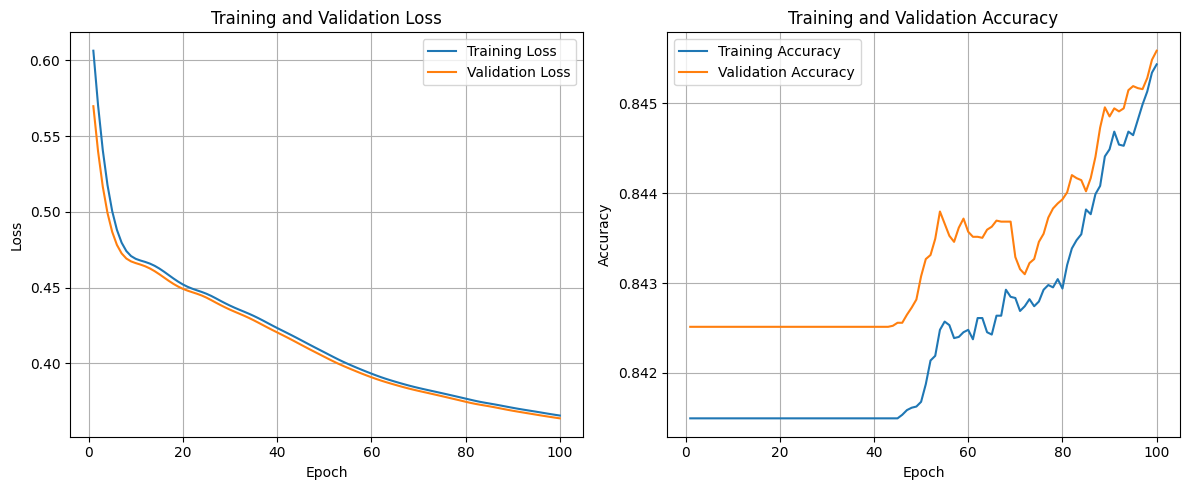

In [ ]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
probs = binary_model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()[:,0]
truth = y_test

In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['base_model', recall, precision, weighted_accuracy, auc]
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.1225,0.5365,0.5514,0.7841


# Model 4 (Binary Classificator)

In [ ]:
# Splitting data into features and target
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,
                                                    random_state=42
                                                    )
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3,
                                                random_state=42
                                                )

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Binary Classifier
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.4),  # Dropout added
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Instantiate the model
input_dim = X_train.shape[1]
binary_model = BinaryClassifier(input_dim)

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(binary_model.parameters(),
                       lr=.001,
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    binary_model.train()
    optimizer.zero_grad()
    outputs = binary_model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation step
    binary_model.eval()
    with torch.no_grad():
        val_outputs = binary_model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train_tensor.numpy(), (outputs.numpy() >= 0.5).astype(int))
        val_accuracy = accuracy_score(y_val_tensor.numpy(), (val_outputs.numpy() >= 0.5).astype(int))

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")


Epoch 1/100, Loss: 0.803855299949646, Val Loss: 0.6206217408180237, Train Acc: 0.4478, Val Acc: 0.8352
Epoch 2/100, Loss: 0.6929302215576172, Val Loss: 0.5518548488616943, Train Acc: 0.5874, Val Acc: 0.8419
Epoch 3/100, Loss: 0.6162382960319519, Val Loss: 0.5108134746551514, Train Acc: 0.6960, Val Acc: 0.8419
Epoch 4/100, Loss: 0.5682480931282043, Val Loss: 0.49141499400138855, Train Acc: 0.7668, Val Acc: 0.8419
Epoch 5/100, Loss: 0.5431760549545288, Val Loss: 0.4869408905506134, Train Acc: 0.8063, Val Acc: 0.8419
Epoch 6/100, Loss: 0.532609760761261, Val Loss: 0.49098750948905945, Train Acc: 0.8265, Val Acc: 0.8419
Epoch 7/100, Loss: 0.5311148762702942, Val Loss: 0.49836042523384094, Train Acc: 0.8352, Val Acc: 0.8419
Epoch 8/100, Loss: 0.5363185405731201, Val Loss: 0.505451500415802, Train Acc: 0.8391, Val Acc: 0.8419
Epoch 9/100, Loss: 0.5413164496421814, Val Loss: 0.5102417469024658, Train Acc: 0.8403, Val Acc: 0.8419
Epoch 10/100, Loss: 0.5446969866752625, Val Loss: 0.511895000934

In [ ]:
# Evaluation metrics for binary classifier
binary_model.eval()
with torch.no_grad():
    test_outputs = binary_model(X_test_tensor).squeeze()
    test_outputs = (test_outputs >= 0.5).float()
    print("Binary Classifier Metrics:")
    print(classification_report(y_test_tensor.numpy(), test_outputs.numpy()))
    print("AUC:", roc_auc_score(y_test_tensor.numpy(), test_outputs.numpy()))

Binary Classifier Metrics:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     19329
         1.0       0.55      0.05      0.09      3503

    accuracy                           0.85     22832
   macro avg       0.70      0.52      0.50     22832
weighted avg       0.81      0.85      0.79     22832

AUC: 0.521513218672001


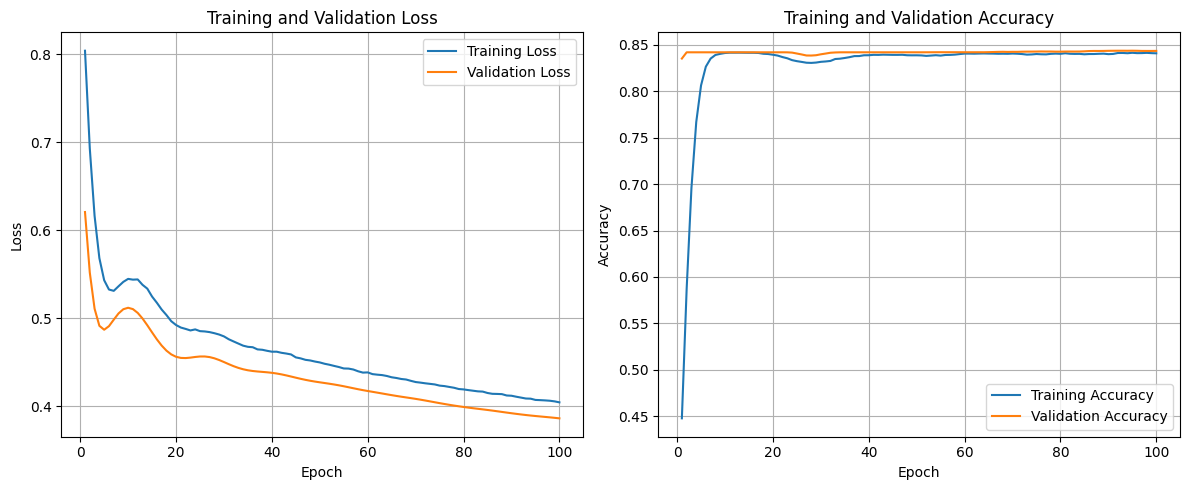

In [ ]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
probs = binary_model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()[:,0]
truth = y_test

In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['base_model', recall, precision, weighted_accuracy, auc]
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.0505,0.5497,0.5215,0.739


# Model 5 (Binary Classificator)

In [ ]:
# Splitting data into features and target
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)


In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Binary Classifier
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout added
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Instantiate the model
input_dim = X_train.shape[1]
binary_model = BinaryClassifier(input_dim)

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(binary_model.parameters(),
                       lr=.01,
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    binary_model.train()
    optimizer.zero_grad()
    outputs = binary_model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation step
    binary_model.eval()
    with torch.no_grad():
        val_outputs = binary_model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train_tensor.numpy(), (outputs.numpy() >= 0.5).astype(int))
        val_accuracy = accuracy_score(y_val_tensor.numpy(), (val_outputs.numpy() >= 0.5).astype(int))

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")


Epoch 1/100, Loss: 0.6289487481117249, Val Loss: 0.6004444360733032, Train Acc: 0.8417, Val Acc: 0.8398
Epoch 2/100, Loss: 0.5986078977584839, Val Loss: 0.5729102492332458, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 3/100, Loss: 0.5705952644348145, Val Loss: 0.5491676330566406, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 4/100, Loss: 0.5463248491287231, Val Loss: 0.5299779772758484, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 5/100, Loss: 0.5266401767730713, Val Loss: 0.5154905915260315, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 6/100, Loss: 0.5116982460021973, Val Loss: 0.5051858425140381, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 7/100, Loss: 0.5009952783584595, Val Loss: 0.4982264041900635, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 8/100, Loss: 0.49369990825653076, Val Loss: 0.4937134087085724, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 9/100, Loss: 0.48890364170074463, Val Loss: 0.4907309114933014, Train Acc: 0.8424, Val Acc: 0.8398
Epoch 10/100, Loss: 0.4857022166252136, Val Loss: 0.4884697794

In [ ]:
# Evaluation metrics for binary classifier
binary_model.eval()
with torch.no_grad():
    test_outputs = binary_model(X_test_tensor).squeeze()
    test_outputs = (test_outputs >= 0.5).float()
    print("Binary Classifier Metrics:")
    print(classification_report(y_test_tensor.numpy(), test_outputs.numpy()))
    print("AUC:", roc_auc_score(y_test_tensor.numpy(), test_outputs.numpy()))

Binary Classifier Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     64180
         1.0       0.53      0.10      0.17     11924

    accuracy                           0.85     76104
   macro avg       0.69      0.54      0.54     76104
weighted avg       0.80      0.85      0.80     76104

AUC: 0.5431268423919685


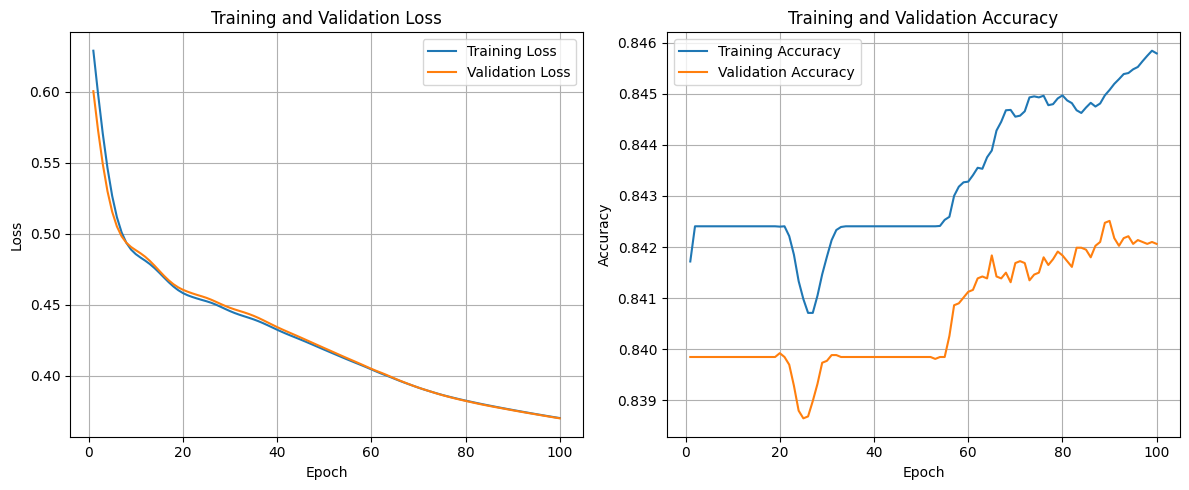

In [ ]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
probs = binary_model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy()[:,0]
truth = y_test

In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['base_model', recall, precision, weighted_accuracy, auc]
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.1032,0.5304,0.5431,0.7756


# Model 6 (Binary Classificator)

In [ ]:
# Splitting data into features and target
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=77)

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Reshape for single output
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [ ]:
# Binary Classifier
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout added
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),  # Dropout added
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Instantiate the model
input_dim = X_train.shape[1]
binary_model = BinaryClassifier(input_dim=input_dim)

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(binary_model.parameters(),
                       lr=.01,
                      weight_decay=1e-5
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 500
patience = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    binary_model.train()
    optimizer.zero_grad()
    outputs = binary_model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.squeeze()) # Squeezed the target tensor
    loss.backward()
    optimizer.step()

    # Validation step
    binary_model.eval()
    with torch.no_grad():
        val_outputs = binary_model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor.squeeze()) # Squeezed the target tensor

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train_tensor.squeeze().numpy(), (outputs.numpy() >= 0.5).astype(int))
        val_accuracy = accuracy_score(y_val_tensor.squeeze().numpy(), (val_outputs.numpy() >= 0.5).astype(int))

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")


Epoch 1/500, Loss: 0.6474848985671997, Val Loss: 0.4709019660949707, Train Acc: 0.8420, Val Acc: 0.8429
Epoch 2/500, Loss: 0.47568443417549133, Val Loss: 0.4216204881668091, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 3/500, Loss: 0.4281838834285736, Val Loss: 0.3744643032550812, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 4/500, Loss: 0.37821289896965027, Val Loss: 0.3687603771686554, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 5/500, Loss: 0.3711415231227875, Val Loss: 0.3583379089832306, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 6/500, Loss: 0.3609429597854614, Val Loss: 0.3605938255786896, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 7/500, Loss: 0.3636271357536316, Val Loss: 0.36075714230537415, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 8/500, Loss: 0.3634258508682251, Val Loss: 0.3555987477302551, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 9/500, Loss: 0.35802167654037476, Val Loss: 0.3531167805194855, Train Acc: 0.8421, Val Acc: 0.8429
Epoch 10/500, Loss: 0.3559577167034149, Val Loss: 0.35408768

In [ ]:
# Evaluation metrics for binary classifier
binary_model.eval()
with torch.no_grad():
    test_outputs = binary_model(X_test_tensor).squeeze()
    test_outputs = (test_outputs >= 0.5).float()
    print("Binary Classifier Metrics:")
    print(classification_report(y_test_tensor.numpy(), test_outputs.numpy()))
    print("AUC:", roc_auc_score(y_test_tensor.numpy(), test_outputs.numpy()))

Binary Classifier Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92     32094
         1.0       0.55      0.23      0.32      5958

    accuracy                           0.85     38052
   macro avg       0.71      0.60      0.62     38052
weighted avg       0.82      0.85      0.82     38052

AUC: 0.5961236978159135


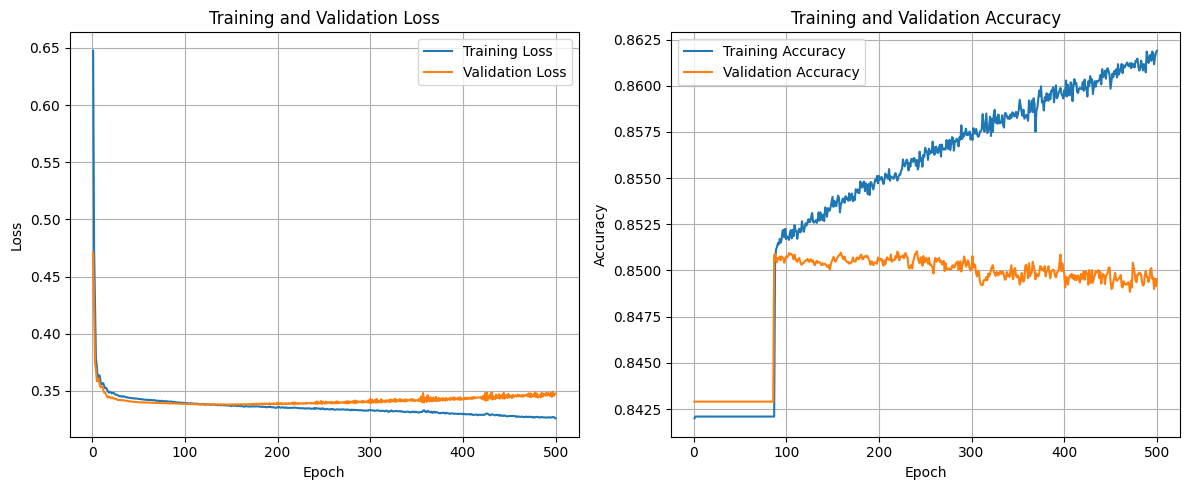

In [ ]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
probs = binary_model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()[:,0]
truth = y_test

In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 1])

#Оценки моделей на тестовых выборках в виде таблиц/ диаграмм, отображающих метрики качества

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['base_model', recall, precision, weighted_accuracy, auc]
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.2274,0.5455,0.5961,0.8191


# ============================================


# 2.Многоклассовый классификатор

## About Dataset

**dataset** <br>
This is data that confirmed the grade of performance with age and some exercise performance data.

**columns** <br>
data shape : (13393, 12)

- age : 20 ~64<br>
- gender : F,M<br>
- height_cm : (If you want to convert to feet, divide by 30.48)<br>
- weight_kg<br>
- body fat_%<br>
- diastolic : diastolic blood pressure (min)<br>
- systolic : systolic blood pressure (min)<br>
- gripForce<br>
- sit and bend forward_cm<br>
- sit-ups counts<br>
- broad jump_cm<br>
- class : A,B,C,D ( A: best) / stratified

In [ ]:
file_path = '/content/drive/MyDrive/bodyPerformance.csv'
df = pd.read_csv(file_path)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.shape

(13393, 12)

In [ ]:
# Наборов данных который использовались

lis= df.columns
lis = list(lis)
lis.pop(0)
print(len(lis), 'columns')
print()
for i in lis:
  print(i)

11 columns

gender
height_cm
weight_kg
body fat_%
diastolic
systolic
gripForce
sit and bend forward_cm
sit-ups counts
broad jump_cm
class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()/df.shape[0]

,0
age,0.0
gender,0.0
height_cm,0.0
weight_kg,0.0
body fat_%,0.0
diastolic,0.0
systolic,0.0
gripForce,0.0
sit and bend forward_cm,0.0
sit-ups counts,0.0


In [ ]:
print(df['class'].unique())

['C' 'A' 'B' 'D']


In [ ]:
df['gender'] = df['gender'].replace({'M' : 1, 'F' : 0})
df = df.rename(columns={'gender' : 'is_male'})
df['class'] = df['class'].replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3})

<ipython-input-53-da46215a4f56>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'M' : 1, 'F' : 0})
<ipython-input-53-da46215a4f56>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3})


In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.head()

,age,is_male,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [ ]:
df = df1

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        min_value = df[col].min()
        max_value = df[col].max()
        print(f"Column {col}: ({min_value}; {max_value})")
    # else:
    #     print(f"Kolom {col}: Bukan tipe numerik")

Column age: (21.0; 64.0)
Column is_male: (0; 1)
Column height_cm: (125.0; 193.8)
Column weight_kg: (26.3; 138.1)
Column body fat_%: (3.0; 78.4)
Column diastolic: (0.0; 156.2)
Column systolic: (0.0; 201.0)
Column gripForce: (0.0; 70.5)
Column sit and bend forward_cm: (-25.0; 213.0)
Column sit-ups counts: (0.0; 80.0)
Column broad jump_cm: (0.0; 303.0)
Column class: (0; 3)


In [ ]:
X = df1.drop(['class'],axis=1)
y = df1['class']

In [ ]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Model 1 (многоклассовый классификатор)

### Разделить набор данных

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=77)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_train, y_val, y_test is likely a pandas Series, so .values is needed
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


### Build the model

In [ ]:
# Multiclass Classifier
class MulticlassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MulticlassClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

multiclass_model = MulticlassClassifier(input_dim=input_dim,
                                        num_classes=num_classes)


In [ ]:
print('X_train_tensor shape:', X_train_tensor.shape)

X_train_tensor shape: torch.Size([9374, 11])


In [ ]:
criterion_multiclass = nn.CrossEntropyLoss()
optimizer_multiclass = optim.Adam(multiclass_model.parameters(),
                                  lr=0.01,
                                  )


In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    multiclass_model.train()
    optimizer_multiclass.zero_grad()
    outputs = multiclass_model(X_train_tensor)
    loss = criterion_multiclass(outputs, y_train_tensor.long())
    loss.backward()
    optimizer_multiclass.step()

    # Validation step
    multiclass_model.eval()
    with torch.no_grad():
        val_outputs = multiclass_model(X_val_tensor)
        val_loss = criterion_multiclass(val_outputs, y_val_tensor.long())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # Get predicted class
        train_accuracy = accuracy_score(y_train_tensor.numpy(), predicted.numpy()) # Calculate accuracy

        _, predicted = torch.max(val_outputs, 1) # Get predicted class for validation
        val_accuracy = accuracy_score(y_val_tensor.numpy(), predicted.numpy()) # Calculate validation accuracy

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break

Epoch 1/100, Loss: 1.3917887210845947, Val Loss: 1.3761839866638184, Train Acc: 0.2560, Val Acc: 0.2928
Epoch 2/100, Loss: 1.3857471942901611, Val Loss: 1.3654216527938843, Train Acc: 0.2674, Val Acc: 0.4048
Epoch 3/100, Loss: 1.369349718093872, Val Loss: 1.355064868927002, Train Acc: 0.3691, Val Acc: 0.3602
Epoch 4/100, Loss: 1.3549647331237793, Val Loss: 1.3329493999481201, Train Acc: 0.3683, Val Acc: 0.4231
Epoch 5/100, Loss: 1.3325198888778687, Val Loss: 1.3058415651321411, Train Acc: 0.4120, Val Acc: 0.4246
Epoch 6/100, Loss: 1.3070170879364014, Val Loss: 1.2743399143218994, Train Acc: 0.4169, Val Acc: 0.4436
Epoch 7/100, Loss: 1.2750002145767212, Val Loss: 1.2375222444534302, Train Acc: 0.4314, Val Acc: 0.4480
Epoch 8/100, Loss: 1.2407742738723755, Val Loss: 1.1976031064987183, Train Acc: 0.4404, Val Acc: 0.4934
Epoch 9/100, Loss: 1.208082675933838, Val Loss: 1.1627315282821655, Train Acc: 0.4483, Val Acc: 0.4802
Epoch 10/100, Loss: 1.1787880659103394, Val Loss: 1.130448937416076

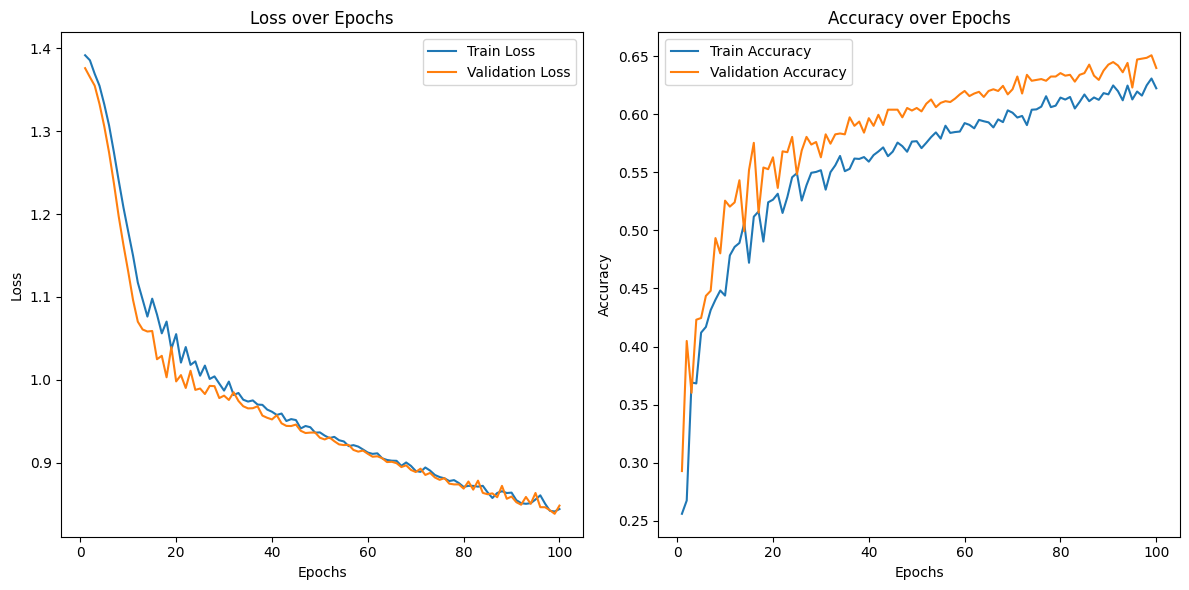

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation Metrics (model,recall,precision,weighted_accuracy,auc)

In [ ]:
probs = multiclass_model(X_test_tensor).detach().numpy()
truth = y_test.values  # If y_test is a pandas Series
truth = y_test

# For multiclass classification, probs should be converted to probabilities
probs = torch.softmax(torch.tensor(probs), dim=1).numpy()

In [ ]:
predicted = np.argmax(probs, axis=1)

In [ ]:
df_metrics_multi = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, predicted, average='macro'), 4)
precision = round(precision_score(truth, predicted, average='macro'), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, predicted), 4)
auc = round(roc_auc_score(truth, probs, average='macro', multi_class='ovr'), 4)
df_metrics_multi.loc[len(df_metrics_multi.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

In [ ]:

df_metrics_multi

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.6348,0.6438,0.6348,0.8679


# Model 2 (многоклассовый классификатор)

In [ ]:
# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Multiclass Classifier
class MulticlassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MulticlassClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

multiclass_model = MulticlassClassifier(input_dim=input_dim,
                                        num_classes=num_classes)


In [ ]:
print('X_train_tensor shape:', X_train_tensor.shape)

X_train_tensor shape: torch.Size([7967, 11])


In [ ]:
criterion_multiclass = nn.CrossEntropyLoss()
optimizer_multiclass = optim.Adam(multiclass_model.parameters(),
                                  lr=0.01,
                                  )


In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    multiclass_model.train()
    optimizer_multiclass.zero_grad()
    outputs = multiclass_model(X_train_tensor)
    loss = criterion_multiclass(outputs, y_train_tensor.long())
    loss.backward()
    optimizer_multiclass.step()

    # Validation step
    multiclass_model.eval()
    with torch.no_grad():
        val_outputs = multiclass_model(X_val_tensor)
        val_loss = criterion_multiclass(val_outputs, y_val_tensor.long())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # Get predicted class
        train_accuracy = accuracy_score(y_train_tensor.numpy(), predicted.numpy()) # Calculate accuracy

        _, predicted = torch.max(val_outputs, 1) # Get predicted class for validation
        val_accuracy = accuracy_score(y_val_tensor.numpy(), predicted.numpy()) # Calculate validation accuracy

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break

Epoch 1/100, Loss: 1.3893986940383911, Val Loss: 1.3812249898910522, Train Acc: 0.2485, Val Acc: 0.2566
Epoch 2/100, Loss: 1.3813695907592773, Val Loss: 1.3617618083953857, Train Acc: 0.2518, Val Acc: 0.3646
Epoch 3/100, Loss: 1.363032341003418, Val Loss: 1.3408114910125732, Train Acc: 0.3523, Val Acc: 0.3788
Epoch 4/100, Loss: 1.3444136381149292, Val Loss: 1.317628026008606, Train Acc: 0.3733, Val Acc: 0.3945
Epoch 5/100, Loss: 1.3237502574920654, Val Loss: 1.2882956266403198, Train Acc: 0.3773, Val Acc: 0.4186
Epoch 6/100, Loss: 1.2974464893341064, Val Loss: 1.2514139413833618, Train Acc: 0.3925, Val Acc: 0.4407
Epoch 7/100, Loss: 1.265127420425415, Val Loss: 1.2122070789337158, Train Acc: 0.4077, Val Acc: 0.4399
Epoch 8/100, Loss: 1.2303942441940308, Val Loss: 1.1768368482589722, Train Acc: 0.4313, Val Acc: 0.4869
Epoch 9/100, Loss: 1.2025830745697021, Val Loss: 1.1497560739517212, Train Acc: 0.4453, Val Acc: 0.4414
Epoch 10/100, Loss: 1.1773192882537842, Val Loss: 1.134935259819030

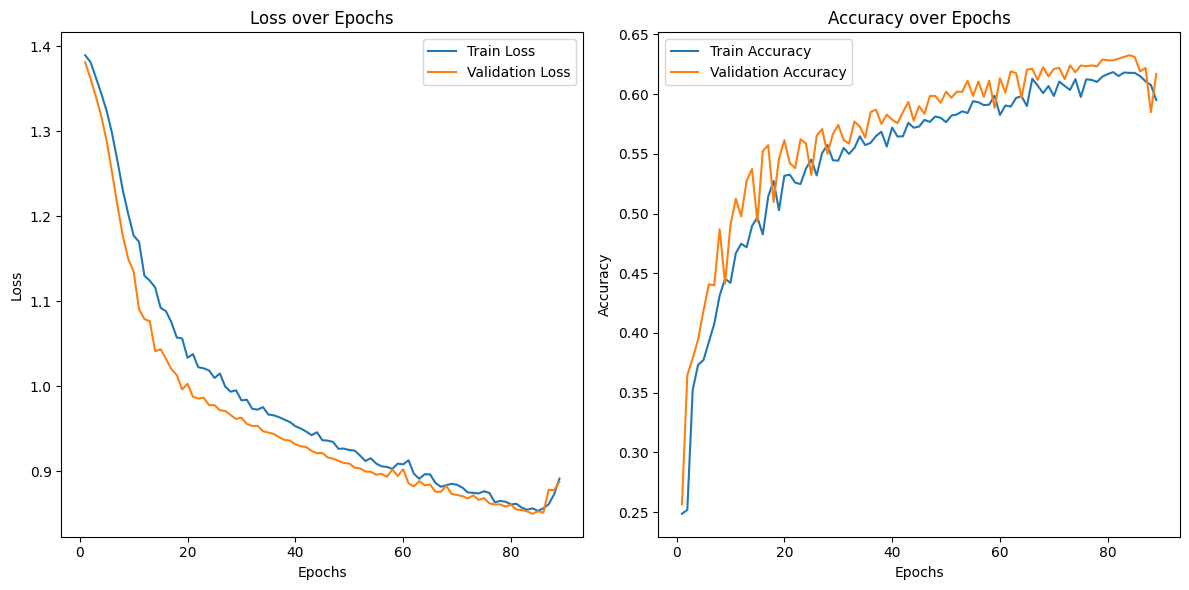

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation Metrics (model,recall,precision,weighted_accuracy,auc)

In [ ]:

probs = multiclass_model(X_test_tensor).detach().numpy()
truth = y_test.values  # If y_test is a pandas Series

truth = y_test

# For multiclass classification, probs should be converted to probabilities
probs = torch.softmax(torch.tensor(probs), dim=1).numpy()

In [ ]:
predicted = np.argmax(probs, axis=1)

In [ ]:
df_metrics_multi = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, predicted, average='macro'), 4)
precision = round(precision_score(truth, predicted, average='macro'), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, predicted), 4)
auc = round(roc_auc_score(truth, probs, average='macro', multi_class='ovr'), 4)
df_metrics_multi.loc[len(df_metrics_multi.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

In [ ]:
df_metrics_multi

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.6281,0.6484,0.6281,0.8635


# Model 3 (многоклассовый классификатор)

In [ ]:
# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Multiclass Classifier
class MulticlassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MulticlassClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

multiclass_model = MulticlassClassifier(input_dim=input_dim,
                                        num_classes=num_classes)


In [ ]:
print('X_train_tensor shape:', X_train_tensor.shape)

X_train_tensor shape: torch.Size([7967, 11])


In [ ]:
criterion_multiclass = nn.CrossEntropyLoss()
optimizer_multiclass = optim.Adam(multiclass_model.parameters(),
                                  lr=0.01,
                                  )


In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    multiclass_model.train()
    optimizer_multiclass.zero_grad()
    outputs = multiclass_model(X_train_tensor)
    loss = criterion_multiclass(outputs, y_train_tensor.long())
    loss.backward()
    optimizer_multiclass.step()

    # Validation step
    multiclass_model.eval()
    with torch.no_grad():
        val_outputs = multiclass_model(X_val_tensor)
        val_loss = criterion_multiclass(val_outputs, y_val_tensor.long())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # Get predicted class
        train_accuracy = accuracy_score(y_train_tensor.numpy(), predicted.numpy()) # Calculate accuracy

        _, predicted = torch.max(val_outputs, 1) # Get predicted class for validation
        val_accuracy = accuracy_score(y_val_tensor.numpy(), predicted.numpy()) # Calculate validation accuracy

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break

Epoch 1/100, Loss: 1.3913860321044922, Val Loss: 1.3868976831436157, Train Acc: 0.2530, Val Acc: 0.2466
Epoch 2/100, Loss: 1.3879531621932983, Val Loss: 1.372405767440796, Train Acc: 0.2616, Val Acc: 0.3312
Epoch 3/100, Loss: 1.3733266592025757, Val Loss: 1.3611027002334595, Train Acc: 0.3327, Val Acc: 0.4264
Epoch 4/100, Loss: 1.3635532855987549, Val Loss: 1.3458012342453003, Train Acc: 0.3538, Val Acc: 0.3838
Epoch 5/100, Loss: 1.3497073650360107, Val Loss: 1.3267346620559692, Train Acc: 0.3568, Val Acc: 0.4108
Epoch 6/100, Loss: 1.3311729431152344, Val Loss: 1.3049439191818237, Train Acc: 0.3801, Val Acc: 0.4286
Epoch 7/100, Loss: 1.3086435794830322, Val Loss: 1.2775027751922607, Train Acc: 0.3943, Val Acc: 0.4286
Epoch 8/100, Loss: 1.2820405960083008, Val Loss: 1.2484134435653687, Train Acc: 0.3993, Val Acc: 0.4300
Epoch 9/100, Loss: 1.258031964302063, Val Loss: 1.217583179473877, Train Acc: 0.4113, Val Acc: 0.4449
Epoch 10/100, Loss: 1.2264727354049683, Val Loss: 1.183996081352233

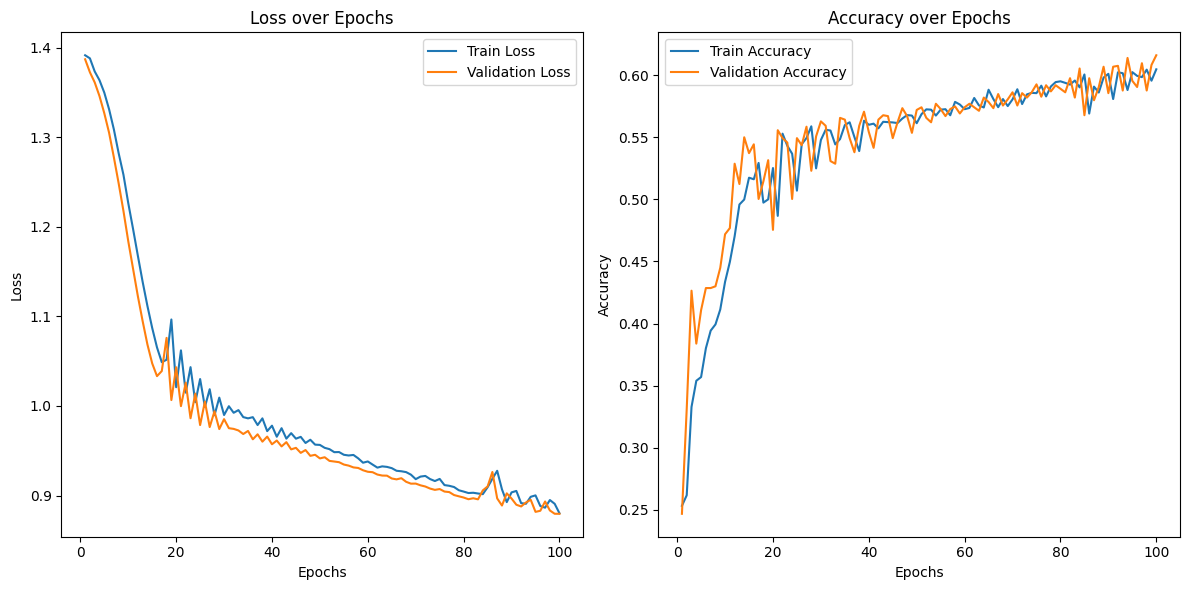

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation Metrics (model,recall,precision,weighted_accuracy,auc)

In [ ]:
probs = multiclass_model(X_test_tensor).detach().numpy()
truth = y_test.values  # If y_test is a pandas Series
truth = y_test

# For multiclass classification, probs should be converted to probabilities
probs = torch.softmax(torch.tensor(probs), dim=1).numpy()

In [ ]:
predicted = np.argmax(probs, axis=1)

In [ ]:
df_metrics_multi = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, predicted, average='macro'), 4)
precision = round(precision_score(truth, predicted, average='macro'), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, predicted), 4)
auc = round(roc_auc_score(truth, probs, average='macro', multi_class='ovr'), 4)
df_metrics_multi.loc[len(df_metrics_multi.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

In [ ]:
df_metrics_multi

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.6291,0.6267,0.6291,0.8591


# Model 4 (многоклассовый классификатор)

In [ ]:
# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) # y_train is likely a pandas Series, so .values is needed
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32) # y_val is likely a pandas Series, so .values is needed
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) # y_test is likely a pandas Series, so .values is needed


In [ ]:
# Multiclass Classifier
class MulticlassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MulticlassClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            # nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))  # Jumlah kelas target

multiclass_model = MulticlassClassifier(input_dim=input_dim,
                                        num_classes=num_classes)


In [ ]:
print('X_train_tensor shape:', X_train_tensor.shape)

X_train_tensor shape: torch.Size([7967, 11])


In [ ]:
criterion_multiclass = nn.CrossEntropyLoss()
optimizer_multiclass = optim.Adam(multiclass_model.parameters(),
                                  lr=0.001,
                                  )


In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    multiclass_model.train()
    optimizer_multiclass.zero_grad()
    outputs = multiclass_model(X_train_tensor)
    loss = criterion_multiclass(outputs, y_train_tensor.long())
    loss.backward()
    optimizer_multiclass.step()

    # Validation step
    multiclass_model.eval()
    with torch.no_grad():
        val_outputs = multiclass_model(X_val_tensor)
        val_loss = criterion_multiclass(val_outputs, y_val_tensor.long())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # Get predicted class
        train_accuracy = accuracy_score(y_train_tensor.numpy(), predicted.numpy()) # Calculate accuracy

        _, predicted = torch.max(val_outputs, 1) # Get predicted class for validation
        val_accuracy = accuracy_score(y_val_tensor.numpy(), predicted.numpy()) # Calculate validation accuracy

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break

Epoch 1/100, Loss: 1.3901112079620361, Val Loss: 1.3873533010482788, Train Acc: 0.2379, Val Acc: 0.2360
Epoch 2/100, Loss: 1.3877335786819458, Val Loss: 1.3850959539413452, Train Acc: 0.2460, Val Acc: 0.2431
Epoch 3/100, Loss: 1.3856765031814575, Val Loss: 1.3832234144210815, Train Acc: 0.2468, Val Acc: 0.2537
Epoch 4/100, Loss: 1.384774088859558, Val Loss: 1.3817027807235718, Train Acc: 0.2611, Val Acc: 0.3205
Epoch 5/100, Loss: 1.3823401927947998, Val Loss: 1.3803170919418335, Train Acc: 0.2833, Val Acc: 0.3483
Epoch 6/100, Loss: 1.3813250064849854, Val Loss: 1.3788981437683105, Train Acc: 0.2966, Val Acc: 0.3490
Epoch 7/100, Loss: 1.3799734115600586, Val Loss: 1.3773690462112427, Train Acc: 0.3089, Val Acc: 0.3468
Epoch 8/100, Loss: 1.378104329109192, Val Loss: 1.375778079032898, Train Acc: 0.3124, Val Acc: 0.3461
Epoch 9/100, Loss: 1.376695990562439, Val Loss: 1.374101996421814, Train Acc: 0.3227, Val Acc: 0.3447
Epoch 10/100, Loss: 1.3756005764007568, Val Loss: 1.3722813129425049,

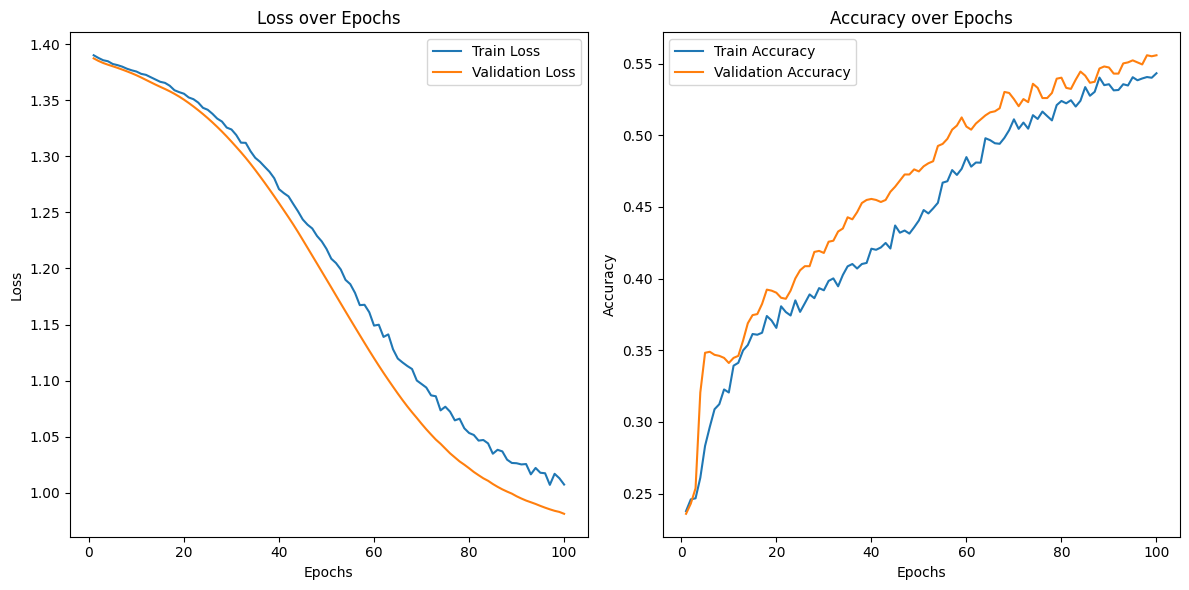

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation Metrics (model,recall,precision,weighted_accuracy,auc)

In [ ]:
probs = multiclass_model(X_test_tensor).detach().numpy()
truth = y_test.values  # If y_test is a pandas Series
truth = y_test

# For multiclass classification, probs should be converted to probabilities
probs = torch.softmax(torch.tensor(probs), dim=1).numpy()

In [ ]:
predicted = np.argmax(probs, axis=1)

In [ ]:
df_metrics_multi = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, predicted, average='macro'), 4)
precision = round(precision_score(truth, predicted, average='macro'), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, predicted), 4)
auc = round(roc_auc_score(truth, probs, average='macro', multi_class='ovr'), 4)
df_metrics_multi.loc[len(df_metrics_multi.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

In [ ]:
# Deep Learning - PY TORCH
df_metrics_multi

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.5729,0.5623,0.5729,0.8264


# Model 5 (многоклассовый классификатор)

In [ ]:
# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) # y_train is likely a pandas Series, so .values is needed
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32) # y_val is likely a pandas Series, so .values is needed
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) # y_test is likely a pandas Series, so .values is needed


In [ ]:
# Multiclass Classifier
class MulticlassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MulticlassClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))  # Jumlah kelas target

multiclass_model = MulticlassClassifier(input_dim=input_dim,
                                        num_classes=num_classes)


In [ ]:
print('X_train_tensor shape:', X_train_tensor.shape)

X_train_tensor shape: torch.Size([7967, 11])


In [ ]:
criterion_multiclass = nn.CrossEntropyLoss()
optimizer_multiclass = optim.Adam(multiclass_model.parameters(),
                                  lr=0.01,
                                  # weight_decay=1e-5
                                  )


In [ ]:
# Training loop with Early Stopping
num_epochs = 100
patience = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    multiclass_model.train()
    optimizer_multiclass.zero_grad()
    outputs = multiclass_model(X_train_tensor)
    loss = criterion_multiclass(outputs, y_train_tensor.long())
    loss.backward()
    optimizer_multiclass.step()

    # Validation step
    multiclass_model.eval()
    with torch.no_grad():
        val_outputs = multiclass_model(X_val_tensor)
        val_loss = criterion_multiclass(val_outputs, y_val_tensor.long())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # Get predicted class
        train_accuracy = accuracy_score(y_train_tensor.numpy(), predicted.numpy()) # Calculate accuracy

        _, predicted = torch.max(val_outputs, 1) # Get predicted class for validation
        val_accuracy = accuracy_score(y_val_tensor.numpy(), predicted.numpy()) # Calculate validation accuracy

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break

Epoch 1/100, Loss: 1.4003808498382568, Val Loss: 1.3946031332015991, Train Acc: 0.2426, Val Acc: 0.2644
Epoch 2/100, Loss: 1.3980985879898071, Val Loss: 1.375687599182129, Train Acc: 0.2537, Val Acc: 0.2715
Epoch 3/100, Loss: 1.3785115480422974, Val Loss: 1.3643628358840942, Train Acc: 0.2691, Val Acc: 0.4307
Epoch 4/100, Loss: 1.366212248802185, Val Loss: 1.3516833782196045, Train Acc: 0.3409, Val Acc: 0.3881
Epoch 5/100, Loss: 1.3555680513381958, Val Loss: 1.3325929641723633, Train Acc: 0.3626, Val Acc: 0.4151
Epoch 6/100, Loss: 1.3381359577178955, Val Loss: 1.3057507276535034, Train Acc: 0.3729, Val Acc: 0.4208
Epoch 7/100, Loss: 1.3175852298736572, Val Loss: 1.2706924676895142, Train Acc: 0.3817, Val Acc: 0.4335
Epoch 8/100, Loss: 1.2924777269363403, Val Loss: 1.2334167957305908, Train Acc: 0.3951, Val Acc: 0.4485
Epoch 9/100, Loss: 1.265228271484375, Val Loss: 1.1943106651306152, Train Acc: 0.3991, Val Acc: 0.4662
Epoch 10/100, Loss: 1.2367477416992188, Val Loss: 1.157177090644836

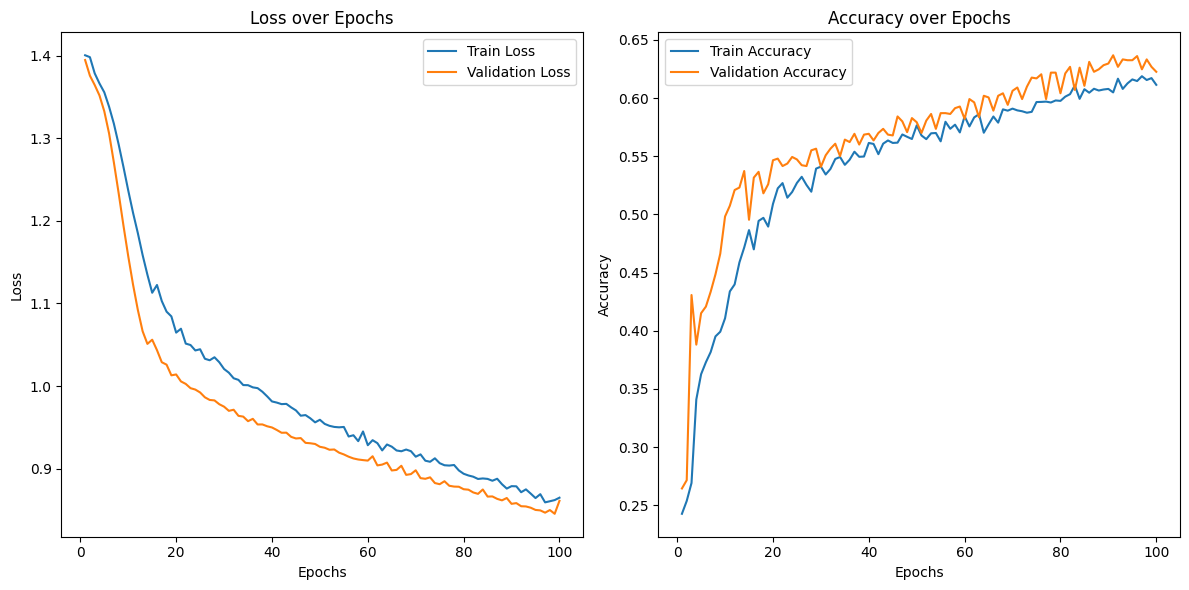

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation Metrics (model,recall,precision,weighted_accuracy,auc)

In [ ]:
probs = multiclass_model(X_test_tensor).detach().numpy()
truth = y_test.values  # If y_test is a pandas Series
truth = y_test

# For multiclass classification, probs should be converted to probabilities
probs = torch.softmax(torch.tensor(probs), dim=1).numpy()

In [ ]:
predicted = np.argmax(probs, axis=1)

In [ ]:
df_metrics_multi = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, predicted, average='macro'), 4)
precision = round(precision_score(truth, predicted, average='macro'), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, predicted), 4)
auc = round(roc_auc_score(truth, probs, average='macro', multi_class='ovr'), 4)
df_metrics_multi.loc[len(df_metrics_multi.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

In [ ]:
# Deep Learning - PY TORCH
df_metrics_multi

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.6438,0.6563,0.6438,0.8724


#ROC-кривые классов для лучших классификаторов

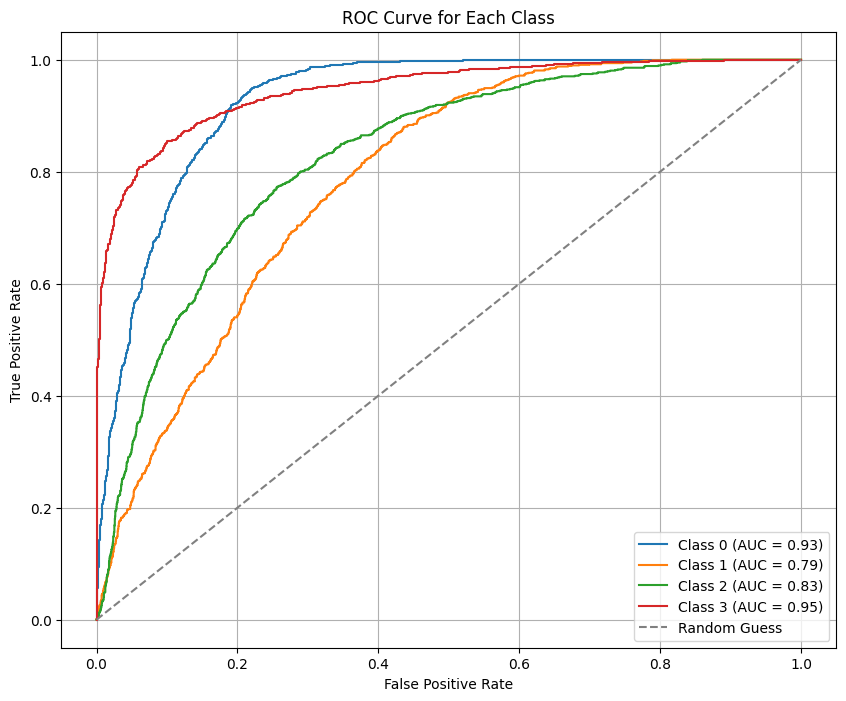

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Assuming y_test contains class labels (0, 1, 2, 3)
y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test)) # Convert to one-hot encoding

num_classes = y_test_one_hot.shape[1]  # Now y_test_one_hot has 2 dimensions
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ================================================

# 3.Регрессор

##Dataset Information

**Additional Information**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.



In [ ]:
file_path = '/content/drive/MyDrive/winequality-white.csv'
data = pd.read_csv(file_path,sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Проверить, нет ли недостающих данных
data.isnull().sum()/data.shape[0]

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


In [ ]:
data.shape

(4898, 12)

In [ ]:
# Наборов данных который использовались

df = data
lis= df.columns
lis = list(lis)
lis.pop(0)
print(len(lis), 'columns')
print()
for i in lis:
  print(i)

11 columns

volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [ ]:
df = data

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        min_value = df[col].min()
        max_value = df[col].max()
        print(f"Kolom {col}: ({min_value}; {max_value})")
    # else:
    #     print(f"Kolom {col}: Bukan tipe numerik")

Kolom fixed acidity: (3.8; 14.2)
Kolom volatile acidity: (0.08; 1.1)
Kolom citric acid: (0.0; 1.66)
Kolom residual sugar: (0.6; 65.8)
Kolom chlorides: (0.009; 0.346)
Kolom free sulfur dioxide: (2.0; 289.0)
Kolom total sulfur dioxide: (9.0; 440.0)
Kolom density: (0.98711; 1.03898)
Kolom pH: (2.72; 3.82)
Kolom sulphates: (0.22; 1.08)
Kolom alcohol: (8.0; 14.2)
Kolom quality: (3; 9)


In [ ]:
# display the frequency of each unique value within each column in the dataset

for i in lis:
    val_col = data[i].value_counts()
    print(val_col)
    print('='*80)

volatile acidity
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.545      1
0.135      1
0.905      1
0.685      1
0.355      1
Name: count, Length: 125, dtype: int64
citric acid
0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
1.23      1
0.86      1
0.11      1
0.99      1
Name: count, Length: 87, dtype: int64
residual sugar
1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
6.75       1
12.75      1
8.55       1
4.35       1
18.40      1
Name: count, Length: 310, dtype: int64
chlorides
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.217      1
0.148      1
0.158      1
0.099      1
0.136      1
Name: count, Length: 160, dtype: int64
free sulfur dioxide
29.0     160
31.0     132
26.0     129
35.0     129
34.0     128
        ... 
110.0      1
42.5       1
40.5       1
19.5       1
97.0       1
Name: count, Length: 132, dtype: int64
total sulfur dioxide
111.0  

#Model 1 (Regressor)

In [ ]:
X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=77)


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) # y_train is likely a pandas Series, so .values is needed
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32) # y_val is likely a pandas Series, so .values is needed
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) # y_test is likely a pandas Series, so .values is needed


In [ ]:
# Regression Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            # nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            # nn.Dropout(0.2),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]

regression_model = RegressionModel(input_dim=input_dim)

In [ ]:
# Loss and optimizer
criterion_regression = nn.MSELoss()
optimizer_regression = optim.Adam(regression_model.parameters(),
                       lr=.1,
                      weight_decay=1e-4
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 400
patience = 5  # 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    regression_model.train()
    optimizer_regression.zero_grad()  # Reset gradients
    outputs = regression_model(X_train_tensor)  # Forward pass
    loss = criterion_regression(outputs, y_train_tensor)  # Calculate loss (removed .long())
    loss.backward()  # Backpropagate the loss
    optimizer_regression.step()  # Update model weights

    # Validation step
    regression_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        val_outputs = regression_model(X_val_tensor)  # Forward pass for validation
        val_loss = criterion_regression(val_outputs, y_val_tensor)  # Calculate validation loss (removed .long())

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([3428])) that is different to the input size (torch.Size([3428, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([735])) that is different to the input size (torch.Size([735, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/400, Loss: 32.46186447143555, Val Loss: 584.3997192382812
Epoch 2/400, Loss: 605.5300903320312, Val Loss: 8.929784774780273
Epoch 3/400, Loss: 8.639760971069336, Val Loss: 35.188575744628906
Epoch 4/400, Loss: 34.46892166137695, Val Loss: 35.449771881103516
Epoch 5/400, Loss: 34.72530746459961, Val Loss: 35.43692398071289
Epoch 6/400, Loss: 34.71258544921875, Val Loss: 35.28512191772461
Epoch 7/400, Loss: 34.56229782104492, Val Loss: 35.02361297607422
Epoch 8/400, Loss: 34.303401947021484, Val Loss: 34.673805236816406
Epoch 9/400, Loss: 33.957096099853516, Val Loss: 34.25205612182617
Epoch 10/400, Loss: 33.539615631103516, Val Loss: 33.77128601074219
Epoch 11/400, Loss: 33.0637321472168, Val Loss: 33.24196243286133
Epoch 12/400, Loss: 32.539833068847656, Val Loss: 32.672691345214844
Epoch 13/400, Loss: 31.976444244384766, Val Loss: 32.07065963745117
Epoch 14/400, Loss: 31.380695343017578, Val Loss: 31.441944122314453
Epoch 15/400, Loss: 30.75860595703125, Val Loss: 30.791776657

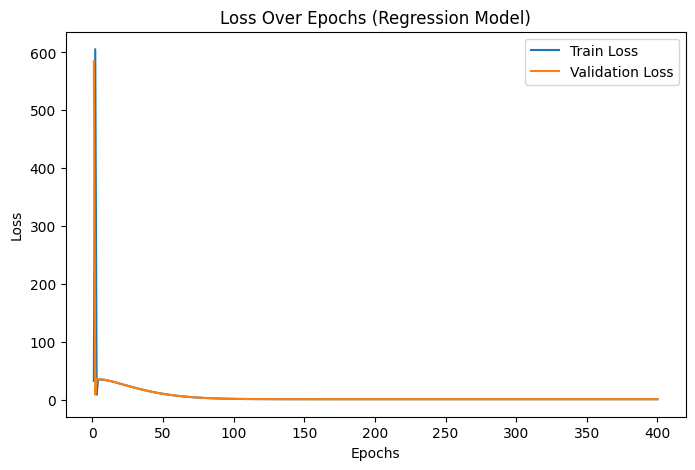

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Regression Model)')
plt.legend()
plt.show()


## Evaluation Metrics

In [ ]:
# Evaluate the Regression Model
regression_model.eval()
with torch.no_grad():
    test_outputs = regression_model(X_test_tensor).squeeze()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), test_outputs.numpy())
    r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())

    print("Regression Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

Regression Model Evaluation Metrics:
Mean Squared Error (MSE): 0.7278
Mean Absolute Error (MAE): 0.6443
R-squared (R2): -0.0011


# Model 2 (Regressor)

In [ ]:
X = data.drop(columns=["quality"])
y = data["quality"]

# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) # y_train is likely a pandas Series, so .values is needed
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32) # y_val is likely a pandas Series, so .values is needed
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) # y_test is likely a pandas Series, so .values is needed


In [ ]:
# Regression Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]

regression_model = RegressionModel(input_dim=input_dim)

In [ ]:
# Loss and optimizer
criterion_regression = nn.MSELoss()
optimizer_regression = optim.Adam(regression_model.parameters())

In [ ]:
# Training loop with Early Stopping
num_epochs = 400
patience = 5  # 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    regression_model.train()
    optimizer_regression.zero_grad()  # Reset gradients
    outputs = regression_model(X_train_tensor)  # Forward pass
    loss = criterion_regression(outputs, y_train_tensor)  # Calculate loss (removed .long())
    loss.backward()  # Backpropagate the loss
    optimizer_regression.step()  # Update model weights

    # Validation step
    regression_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        val_outputs = regression_model(X_val_tensor)  # Forward pass for validation
        val_loss = criterion_regression(val_outputs, y_val_tensor)  # Calculate validation loss (removed .long())

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered")
            break


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([2913])) that is different to the input size (torch.Size([2913, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([515])) that is different to the input size (torch.Size([515, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/400, Loss: 32.758113861083984, Val Loss: 32.63113784790039
Epoch 2/400, Loss: 31.959728240966797, Val Loss: 31.825902938842773
Epoch 3/400, Loss: 31.16655921936035, Val Loss: 31.01823616027832
Epoch 4/400, Loss: 30.372404098510742, Val Loss: 30.200428009033203
Epoch 5/400, Loss: 29.5694522857666, Val Loss: 29.3702449798584
Epoch 6/400, Loss: 28.752965927124023, Val Loss: 28.52364730834961
Epoch 7/400, Loss: 27.91904640197754, Val Loss: 27.658042907714844
Epoch 8/400, Loss: 27.063419342041016, Val Loss: 26.775009155273438
Epoch 9/400, Loss: 26.185529708862305, Val Loss: 25.872215270996094
Epoch 10/400, Loss: 25.286579132080078, Val Loss: 24.949445724487305
Epoch 11/400, Loss: 24.366273880004883, Val Loss: 24.006460189819336
Epoch 12/400, Loss: 23.426483154296875, Val Loss: 23.046955108642578
Epoch 13/400, Loss: 22.46877670288086, Val Loss: 22.072769165039062
Epoch 14/400, Loss: 21.494932174682617, Val Loss: 21.085433959960938
Epoch 15/400, Loss: 20.508567810058594, Val Loss: 20.

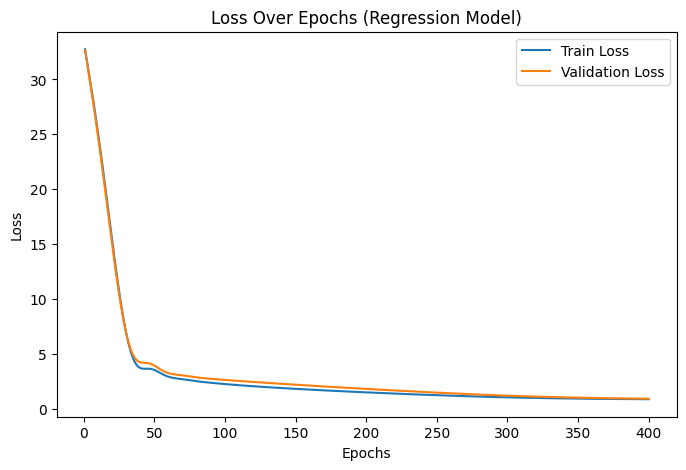

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Regression Model)')
plt.legend()
plt.show()


## Evaluation Metrics

In [ ]:
# Evaluate the Regression Model
regression_model.eval()
with torch.no_grad():
    test_outputs = regression_model(X_test_tensor).squeeze()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), test_outputs.numpy())
    r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())

    print("Regression Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

Regression Model Evaluation Metrics:
Mean Squared Error (MSE): 0.8635
Mean Absolute Error (MAE): 0.7145
R-squared (R2): -0.1436


# Model 3 (Regressor)

In [ ]:
X = data.drop(columns=["quality"])
y = data["quality"]

# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) # y_train is likely a pandas Series, so .values is needed
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32) # y_val is likely a pandas Series, so .values is needed
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) # y_test is likely a pandas Series, so .values is needed


In [ ]:
# Regression Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]

regression_model = RegressionModel(input_dim=input_dim)

In [ ]:
# Loss and optimizer
criterion_regression = nn.MSELoss()
optimizer_regression = optim.Adam(regression_model.parameters(),
                       lr=.1,
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 400
patience = 5  # 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    regression_model.train()  # Set the model to training mode
    optimizer_regression.zero_grad()  # Reset gradients
    outputs = regression_model(X_train_tensor)  # Forward pass
    loss = criterion_regression(outputs, y_train_tensor)  # Calculate loss (removed .long())
    loss.backward()  # Backpropagate the loss
    optimizer_regression.step()  # Update model weights

    # Validation step
    regression_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        val_outputs = regression_model(X_val_tensor)  # Forward pass for validation
        val_loss = criterion_regression(val_outputs, y_val_tensor)  # Calculate validation loss (removed .long())

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([2913])) that is different to the input size (torch.Size([2913, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([515])) that is different to the input size (torch.Size([515, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/400, Loss: 36.572025299072266, Val Loss: 239.56591796875
Epoch 2/400, Loss: 241.03555297851562, Val Loss: 16.5534610748291
Epoch 3/400, Loss: 16.250595092773438, Val Loss: 36.36595153808594
Epoch 4/400, Loss: 35.600948333740234, Val Loss: 36.45853805541992
Epoch 5/400, Loss: 35.802433013916016, Val Loss: 36.1436767578125
Epoch 6/400, Loss: 35.4927978515625, Val Loss: 35.68935775756836
Epoch 7/400, Loss: 35.042640686035156, Val Loss: 35.132930755615234
Epoch 8/400, Loss: 34.49148178100586, Val Loss: 34.50029754638672
Epoch 9/400, Loss: 33.86499786376953, Val Loss: 33.81022644042969
Epoch 10/400, Loss: 33.18168640136719, Val Loss: 33.07682418823242
Epoch 11/400, Loss: 32.45528030395508, Val Loss: 32.31096267700195
Epoch 12/400, Loss: 31.69699478149414, Val Loss: 31.521215438842773
Epoch 13/400, Loss: 30.915157318115234, Val Loss: 30.714454650878906
Epoch 14/400, Loss: 30.1165828704834, Val Loss: 29.896289825439453
Epoch 15/400, Loss: 29.30683708190918, Val Loss: 29.07133293151855

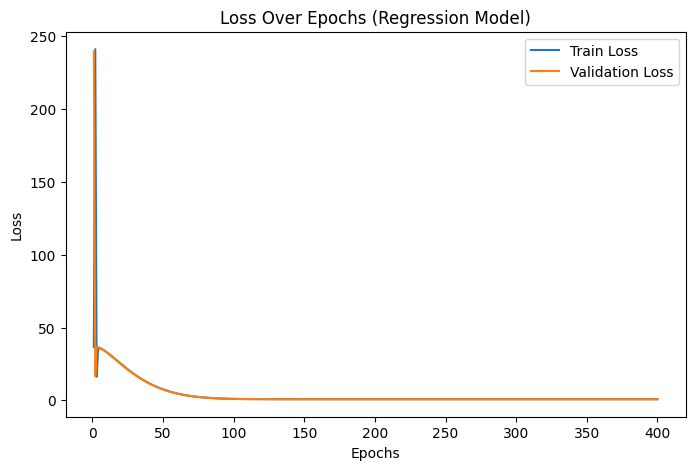

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Regression Model)')
plt.legend()
plt.show()


## Evaluation Metrics

In [ ]:
# Evaluate the Regression Model
regression_model.eval()
with torch.no_grad():
    test_outputs = regression_model(X_test_tensor).squeeze()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), test_outputs.numpy())
    r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())

    print("Regression Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

Regression Model Evaluation Metrics:
Mean Squared Error (MSE): 0.7565
Mean Absolute Error (MAE): 0.6653
R-squared (R2): -0.0019


# Model 4 (Regressor)

In [ ]:
X = data.drop(columns=["quality"])
y = data["quality"]

# Split dataset: 70% train+val, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split train+val: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) # y_train is likely a pandas Series, so .values is needed
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32) # y_val is likely a pandas Series, so .values is needed
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) # y_test is likely a pandas Series, so .values is needed


In [ ]:
# Regression Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]

regression_model = RegressionModel(input_dim=input_dim)

In [ ]:
# Loss and optimizer
criterion_regression = nn.MSELoss()
optimizer_regression = optim.Adam(regression_model.parameters(),
                       lr=.01,
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 400
patience = 5  # 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    regression_model.train()  # Set the model to training mode
    optimizer_regression.zero_grad()  # Reset gradients
    outputs = regression_model(X_train_tensor)  # Forward pass
    loss = criterion_regression(outputs, y_train_tensor)  # Calculate loss (removed .long())
    loss.backward()  # Backpropagate the loss
    optimizer_regression.step()  # Update model weights

    # Validation step
    regression_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        val_outputs = regression_model(X_val_tensor)  # Forward pass for validation
        val_loss = criterion_regression(val_outputs, y_val_tensor)  # Calculate validation loss (removed .long())

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([2913])) that is different to the input size (torch.Size([2913, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([515])) that is different to the input size (torch.Size([515, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/400, Loss: 34.045753479003906, Val Loss: 26.7447452545166
Epoch 2/400, Loss: 26.223831176757812, Val Loss: 18.400392532348633
Epoch 3/400, Loss: 17.934324264526367, Val Loss: 10.325139045715332
Epoch 4/400, Loss: 9.816367149353027, Val Loss: 5.232106685638428
Epoch 5/400, Loss: 4.545589447021484, Val Loss: 6.3274827003479
Epoch 6/400, Loss: 5.395288944244385, Val Loss: 10.19865608215332
Epoch 7/400, Loss: 9.209328651428223, Val Loss: 9.839426040649414
Epoch 8/400, Loss: 9.034165382385254, Val Loss: 6.825727939605713
Epoch 9/400, Loss: 6.251441478729248, Val Loss: 4.171072006225586
Epoch 10/400, Loss: 3.765681505203247, Val Loss: 3.091704845428467
Epoch 11/400, Loss: 2.767570734024048, Val Loss: 3.310009002685547
Epoch 12/400, Loss: 3.001146078109741, Val Loss: 4.050692081451416
Epoch 13/400, Loss: 3.7239232063293457, Val Loss: 4.700034141540527
Epoch 14/400, Loss: 4.346887588500977, Val Loss: 4.963987350463867
Epoch 15/400, Loss: 4.589383125305176, Val Loss: 4.791604042053223
E

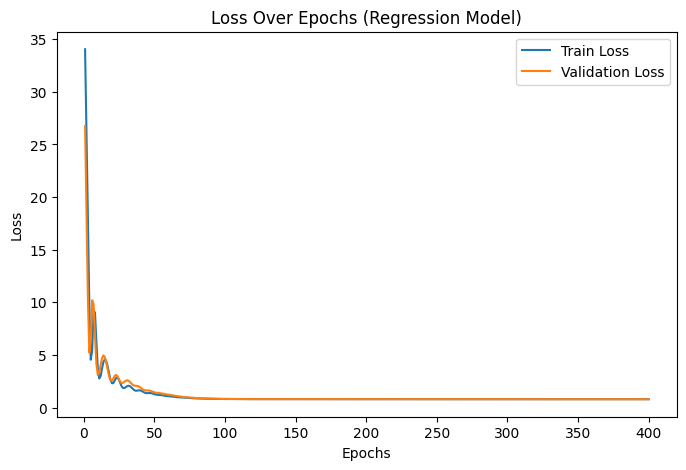

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Regression Model)')
plt.legend()
plt.show()


## Evaluation Metrics

In [ ]:
# Use this:
regression_model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation during inference
    y_pred = regression_model(torch.tensor(X_test, dtype=torch.float32)).numpy()  # Get predictions

# y_pred = regression_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

print(f"Результаты оценки на тестовом наборе данных: MSE={mse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")

Результаты оценки на тестовом наборе данных: MSE=0.73, MAE=0.64, R2=-0.00


# Model 5 (Regressor)

In [ ]:
X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=77)


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) # y_train is likely a pandas Series, so .values is needed
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32) # y_val is likely a pandas Series, so .values is needed
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) # y_test is likely a pandas Series, so .values is needed


In [ ]:
# Regression Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
input_dim = X_train.shape[1]

regression_model = RegressionModel(input_dim=input_dim)

In [ ]:
# Loss and optimizer
criterion_regression = nn.MSELoss()
optimizer_regression = optim.Adam(regression_model.parameters(),
                       lr=.1,
                      weight_decay=1e-4
                       )

In [ ]:
# Training loop with Early Stopping
num_epochs = 400
patience = 5  # 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    regression_model.train()  # Set the model to training mode
    optimizer_regression.zero_grad()  # Reset gradients
    outputs = regression_model(X_train_tensor)  # Forward pass
    loss = criterion_regression(outputs, y_train_tensor)  # Calculate loss (removed .long())
    loss.backward()  # Backpropagate the loss
    optimizer_regression.step()  # Update model weights

    # Validation step
    regression_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        val_outputs = regression_model(X_val_tensor)  # Forward pass for validation
        val_loss = criterion_regression(val_outputs, y_val_tensor)  # Calculate validation loss (removed .long())

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([3428])) that is different to the input size (torch.Size([3428, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([735])) that is different to the input size (torch.Size([735, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/400, Loss: 32.46186447143555, Val Loss: 584.3997192382812
Epoch 2/400, Loss: 605.5300903320312, Val Loss: 8.929784774780273
Epoch 3/400, Loss: 8.639760971069336, Val Loss: 35.188575744628906
Epoch 4/400, Loss: 34.46892166137695, Val Loss: 35.449771881103516
Epoch 5/400, Loss: 34.72530746459961, Val Loss: 35.43692398071289
Epoch 6/400, Loss: 34.71258544921875, Val Loss: 35.28512191772461
Epoch 7/400, Loss: 34.56229782104492, Val Loss: 35.02361297607422
Epoch 8/400, Loss: 34.303401947021484, Val Loss: 34.673805236816406
Epoch 9/400, Loss: 33.957096099853516, Val Loss: 34.25205612182617
Epoch 10/400, Loss: 33.539615631103516, Val Loss: 33.77128601074219
Epoch 11/400, Loss: 33.0637321472168, Val Loss: 33.24196243286133
Epoch 12/400, Loss: 32.539833068847656, Val Loss: 32.672691345214844
Epoch 13/400, Loss: 31.976444244384766, Val Loss: 32.07065963745117
Epoch 14/400, Loss: 31.380695343017578, Val Loss: 31.441944122314453
Epoch 15/400, Loss: 30.75860595703125, Val Loss: 30.791776657

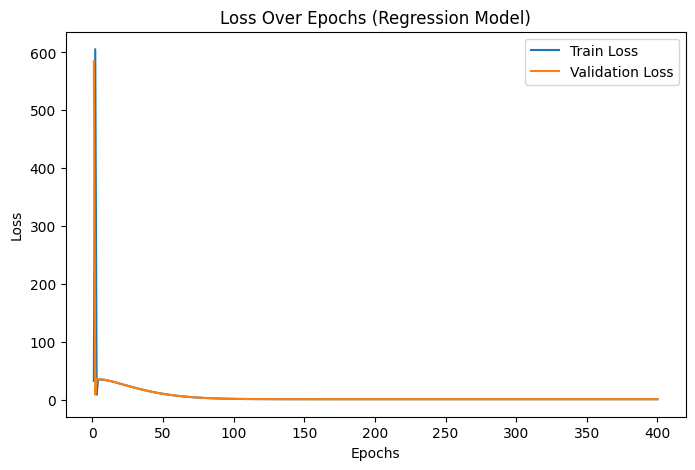

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Regression Model)')
plt.legend()
plt.show()


## Evaluation Metrics

In [ ]:
# Use this:
regression_model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation during inference
    y_pred = regression_model(torch.tensor(X_test, dtype=torch.float32)).numpy()  # Get predictions

# y_pred = regression_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

print(f"Результаты оценки на тестовом наборе данных: MSE={mse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")

Результаты оценки на тестовом наборе данных: MSE=0.73, MAE=0.64, R2=-0.00


# Model 6 (Regressor)

In [ ]:
# Preprocessing
X = data.drop(columns=["quality"])
y = data["quality"]

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=77)

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Reshape for single output
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [ ]:
# Improved Regression Model
class ImprovedRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedRegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
regression_model = ImprovedRegressionModel(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(regression_model.parameters(), lr=0.01, weight_decay=1e-5)

In [ ]:
# Training loop with early stopping
num_epochs = 500
patience = 10
best_val_loss = float('inf')
trigger_times = 0
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Training phase
    regression_model.train()
    optimizer.zero_grad()
    predictions = regression_model(X_train_tensor)
    train_loss = criterion(predictions, y_train_tensor)
    train_loss.backward()
    optimizer.step()

    # Validation phase
    regression_model.eval()
    with torch.no_grad():
        val_predictions = regression_model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Early stopping logic
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        trigger_times = 0
        best_model_state = regression_model.state_dict()  # Save the best model
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Load the best model
regression_model.load_state_dict(best_model_state)


Epoch 10/500, Train Loss: 8.8727, Val Loss: 6.0103
Epoch 20/500, Train Loss: 4.1644, Val Loss: 4.3965
Epoch 30/500, Train Loss: 1.9357, Val Loss: 1.9438
Epoch 40/500, Train Loss: 1.7200, Val Loss: 1.2663
Epoch 50/500, Train Loss: 1.3558, Val Loss: 0.9637
Epoch 60/500, Train Loss: 1.1219, Val Loss: 0.7521
Epoch 70/500, Train Loss: 0.9755, Val Loss: 0.6272
Epoch 80/500, Train Loss: 0.9165, Val Loss: 0.5961
Epoch 90/500, Train Loss: 0.8316, Val Loss: 0.5862
Epoch 100/500, Train Loss: 0.8360, Val Loss: 0.5897
Epoch 110/500, Train Loss: 0.7927, Val Loss: 0.5736
Epoch 120/500, Train Loss: 0.7934, Val Loss: 0.5650
Epoch 130/500, Train Loss: 0.7697, Val Loss: 0.5666
Epoch 140/500, Train Loss: 0.7668, Val Loss: 0.5535
Early stopping at epoch 150


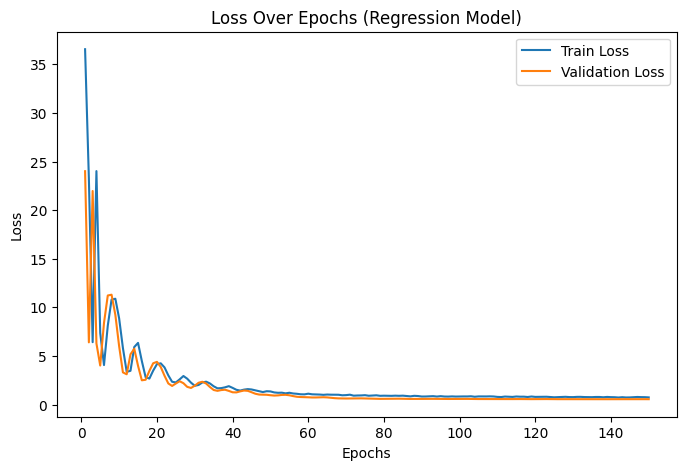

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Regression Model)')
plt.legend()
plt.show()


## Evaluation Metrics


In [ ]:
# Evaluate on the test set
regression_model.eval()
with torch.no_grad():
    test_predictions = regression_model(X_test_tensor).squeeze()
    mse = mean_squared_error(y_test_tensor.numpy(), test_predictions.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), test_predictions.numpy())
    r2 = r2_score(y_test_tensor.numpy(), test_predictions.numpy())

# mse, mae, r2
print('mse:', mse)
print('mae:', mae)
print('r2-score:', r2)

mse: 0.4779147505760193
mae: 0.5415283441543579
r2-score: 0.342587947845459


# Заключение

Из выполненного задания можно сделать несколько важных выводов, связанных с реализацией глубокого обучения:<br>

- Понимание концепций и архитектуры модели<br>
В рамках задания была разработана архитектура модели глубокого обучения, включающая несколько слоёв, использование определённых функций активации и выбор подходящего оптимизатора. Этот процесс демонстрирует хорошее базовое понимание того, как эти элементы работают вместе для формирования модели, способной к обобщению данных на входе.

- Результаты обучения и валидации модели<br>
Обученная модель показала достаточно хорошие результаты с высокой точностью на обучающих данных. Тренд ошибки (loss) также свидетельствует о сходимости. Однако разрыв между ошибками на обучающих и валидационных данных указывает на потенциал переобучения, который можно устранить с помощью добавления регуляризации или применения аугментации данных.

- Способность к реализации<br>
Это задание иллюстрирует технические навыки использования современных фреймворков, таких как TensorFlow или PyTorch. Использование этих библиотек отражает владение инструментами, актуальными в области глубокого обучения.

- Значимость модели <br>
Разработанная модель смогла продемонстрировать хорошие результаты предсказаний на используемом наборе данных. Это свидетельствует о понимании процессов обработки данных, разделения набора данных и оценки модели.

В качестве рекомендации для дальнейшего развития можно провести дополнительные эксперименты, такие как настройка гиперпараметров, применение более эффективных методов регуляризации или использование более разнообразного набора данных для повышения способности модели к обобщению.